# Giới thiệu dự án
Vi-rút Corona là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt.
** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút truyền nhiễm bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 *. Sau đó được tuyên bố là * Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu.

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.

In [1]:
#Download Functions
!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly

In [4]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [33]:
#Read the 5 lines of dataset
#confirmed_df.head()
#deaths_df.head()
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
confirmed_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


# Explore the Data

1. Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.

In [6]:
first_date = (confirmed_df.columns[4],
              deaths_df.columns[4],
              recoveries_df.columns[4])
            
print('First Date:', first_date)

First Date: ('1/22/20', '1/22/20', '1/22/20')


2.Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.

In [7]:
end_date = (confirmed_df.columns[-1],
              deaths_df.columns[-1],
              recoveries_df.columns[-1]
           )
print('End Date:', end_date)

End Date: ('3/9/23', '3/9/23', '3/9/23')


3. Xác định có bao nhiêu quốc gia trong dữ liệu này.

In [8]:
country = (confirmed_df['Country/Region'].nunique(),
          deaths_df['Country/Region'].nunique(),
          recoveries_df['Country/Region'].nunique()
         )
print('Country:', country)

Country: (201, 201, 201)


4. Tính tổng số ngày có trong 3 bộ dữ liệu.Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.

In [9]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
#Tim gia tri tong gia tri duy nhat co trong 3 bo du lieu
total_date_confirmed = confirmed.keys().value_counts().sum()
total_date_deaths = deaths.keys().value_counts().sum()
total_date_recoveries = recoveries.keys().value_counts().sum()
#In ra ket qua
print('Total Date Confirmed:', total_date_confirmed)
print('Total Date Deaths:', total_date_deaths)
print('Total Date Recoveries:', total_date_recoveries)

Total Date Confirmed: 1143
Total Date Deaths: 1143
Total Date Recoveries: 1143


5. Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.

In [10]:
countries_confirmed = confirmed_df['Country/Region'].unique()
countries_deaths = deaths_df['Country/Region'].unique()
countries_recoveries = recoveries_df['Country/Region'].unique()

duplicated_countries = set(countries_confirmed) & set(countries_deaths) & set(countries_recoveries)
duplicated_countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

6. Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.

In [11]:
province_confirmed = confirmed_df['Province/State'].unique()
province_deaths = deaths_df['Province/State'].unique()
province_recoveries = recoveries_df['Province/State'].unique()

duplicated_provinces = set(province_confirmed) & set(province_deaths) & set(province_recoveries)
duplicated_provinces

{'Anguilla',
 'Anhui',
 'Aruba',
 'Australian Capital Territory',
 'Beijing',
 'Bermuda',
 'Bonaire, Sint Eustatius and Saba',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Chongqing',
 'Cook Islands',
 'Curacao',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Fujian',
 'Gansu',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guangdong',
 'Guangxi',
 'Guernsey',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Isle of Man',
 'Jersey',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Martinique',
 'Mayotte',
 'Montserrat',
 'New Caledonia',
 'New South Wales',
 'Ningxia',
 'Niue',
 'Northern Territory',
 'Pitcairn Islands',
 'Qinghai',
 'Queensland',
 'Reunion',
 'Saint Barthelemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Pierre and Miquelon',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Sint Maarten',
 'South Austr

7. Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.

In [12]:
confirmed_df['Province/State'] = confirmed_df['Province/State'].fillna('Unknown')
deaths_df['Province/State'] = deaths_df['Province/State'].fillna('Unknown')
recoveries_df['Province/State'] = recoveries_df['Province/State'].fillna('Unknown')

In [13]:
cols = confirmed_df.keys()
confirmed_df['Total'] = confirmed_df.loc[:, cols[4]:cols[-1]].sum(axis=1)
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total
0,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,129988469
1,Unknown,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,185562654
2,Unknown,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,182741650
3,Unknown,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,24547525
4,Unknown,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,60025203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Unknown,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,412543696
285,Unknown,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,214462
286,Unknown,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,7879435
287,Unknown,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,195953683


In [34]:
# Trích suất số ngày của Covid
date_columns = confirmed_df.columns[4:]

# Unpivot the DataFrame to have dates as rows
melted_confirmed = confirmed_df.melt(id_vars=['Country/Region'], value_vars = date_columns, var_name='Date', value_name='Total_Cases')

# Tìm số ca ghi nhận Covid lớn nhất
max_case_confirmed = melted_confirmed['Total_Cases'].max()

# Xác định quốc gia và ngày mà có số ca Covid nhiều nhất
max_case_info_c = melted_confirmed[melted_confirmed['Total_Cases'] == max_case_confirmed]

max_case_info_c

,Country/Region,Date,Total_Cases
330587,US,Total,53813184406


8. Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.

In [29]:
cols = deaths_df.keys()
deaths_df['Total'] = deaths_df.loc[:, cols[4]:cols[-1]].sum(axis=1)
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total
0,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,16264305
1,Unknown,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,7456140
2,Unknown,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,14703825
3,Unknown,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,381570
4,Unknown,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,3695502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Unknown,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,11264127
285,Unknown,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Unknown,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,4546338
287,Unknown,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,7895166


In [33]:
# Trích suất số ngày của Covid
date_columns = deaths_df.columns[4:]

# Unpivot the DataFrame to have dates as rows
melted_deaths = deaths_df.melt(id_vars=['Country/Region'], value_vars=date_columns, var_name='Date', value_name='Total_Deaths')

# Tìm số ca ghi nhận tử vong Covid lớn nhất 
max_case_deaths = melted_deaths['Total_Deaths'].max()

# Xác định quốc gia và ngày mà có số ca Covid tử vong nhiều nhất
max_case_info_d = melted_deaths[melted_deaths['Total_Deaths'] == max_case_deaths]

max_case_info_d

,Country/Region,Date,Total_Deaths
330587,US,Total,2141631645


In [47]:
cols = recoveries_df.keys()
recoveries_df['Total'] = recoveries_df.loc[:, cols[4]:cols[-1]].sum(axis=1)
recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total
0,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18289880
1,Unknown,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22652652
2,Unknown,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25670233
3,Unknown,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3085649
4,Unknown,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5895800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Unknown,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57608773
270,Unknown,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,Unknown,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,772497
272,Unknown,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21852796


In [35]:
#Quốc gia có tổng số người hồi phục nhiều nhất theo ngày
# Trích suất số ngày của Covid
date_columns = recoveries_df.columns[4:]

# Unpivot the DataFrame to have dates as rows
melted_recoveries = recoveries_df.melt(id_vars=['Country/Region'], value_vars=date_columns, var_name='Date', value_name='Total')

# Tìm số ca ghi nhận hồi phục Covid lớn nhất
max_case_recoveries = melted_recoveries['Total'].max()

# Xác định quốc gia và ngày mà có số ca Covid hồi phục nhiều nhất
max_case_info_r = melted_recoveries[melted_recoveries['Total'] == max_case_recoveries]

max_case_info_r

,Country/Region,Date,Total
153573,India,8/4/21,30974748


9. Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

In [49]:
confirmed_df[confirmed_df['Country/Region'] == 'Vietnam'] #Total_confirm is 8629182740
deaths_df[deaths_df['Country/Region'] == 'Vietnam'] #Total_deaths is 21210356
recoveries_df[recoveries_df['Country/Region'] == 'Vietnam'] #Total_recoveries is 1261448

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total
268,Unknown,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1261448


In [36]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

10. Tính tổng số ca, tổng số người chết, tổng số người phục hồi và tổng số ca nhiễm đang điều trị (active cases) theo thời gian (đơn vị ngày).

In [37]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])


for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


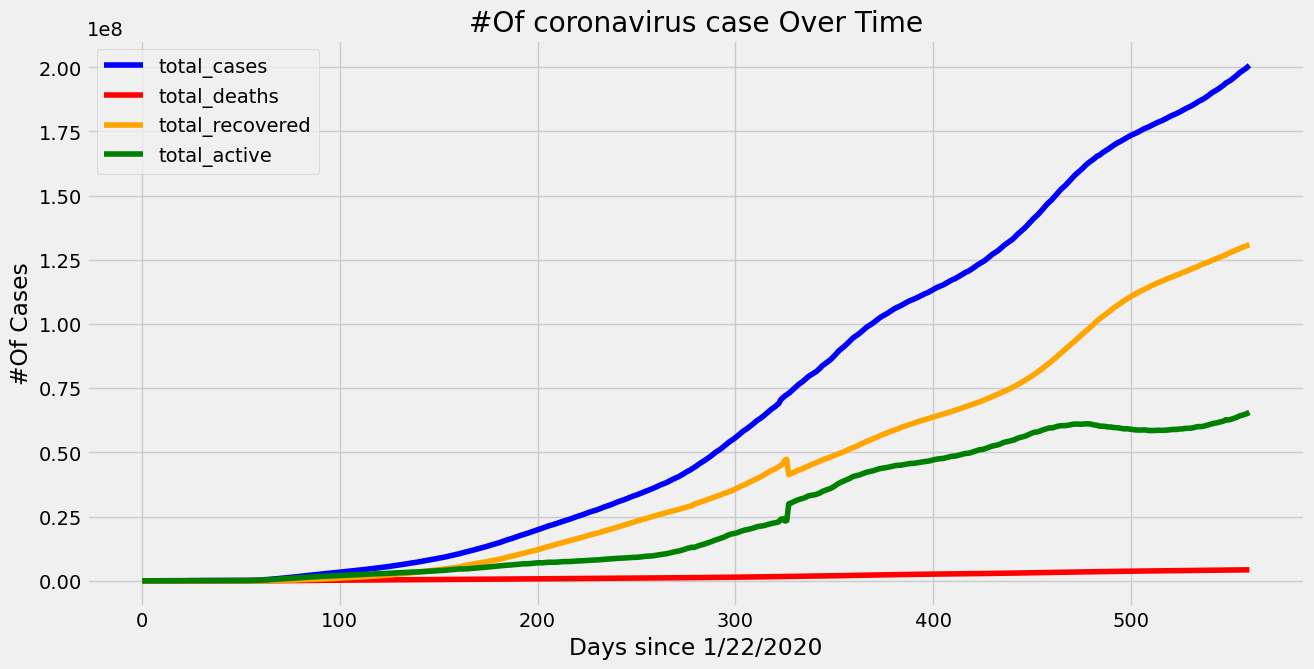

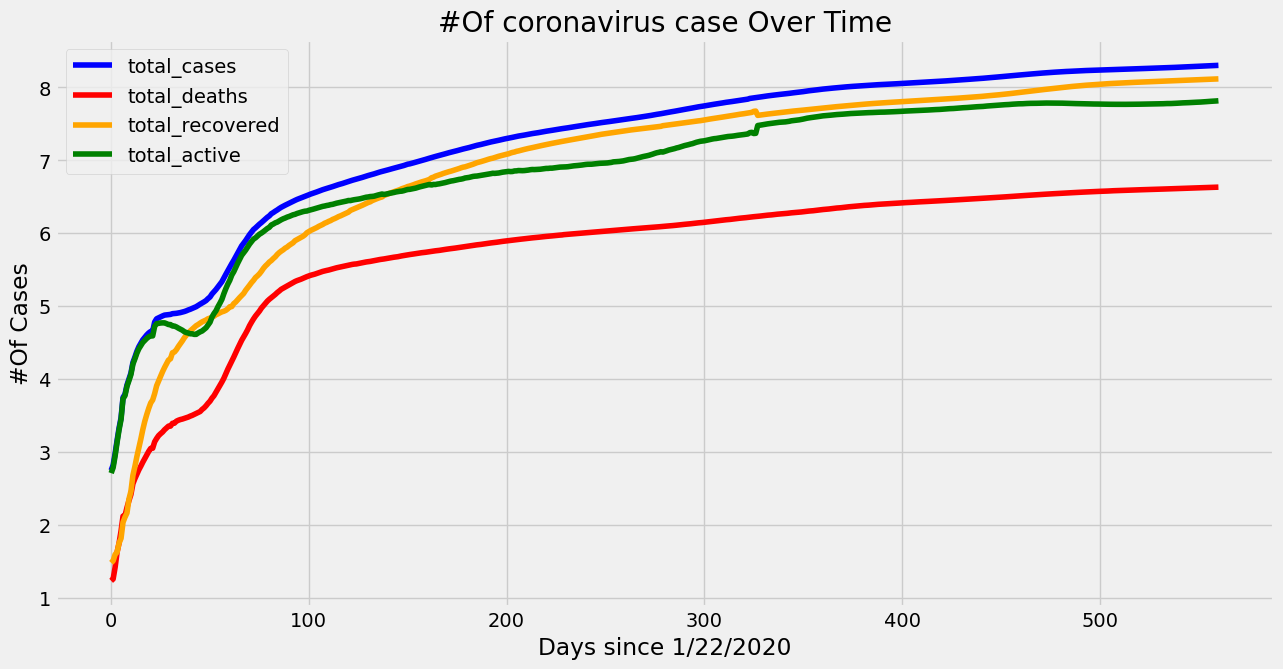

In [38]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

# Khởi tạo các danh sách lưu trữ số liệu
total_cases = []
total_deaths = []
total_recovered = []
total_active = []

# Tính toán tổng số ca bệnh, số người chết, số người hồi phục, và số ca nhiễm đang điều trị
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

# Tạo danh sách các ngày đã được điều chỉnh
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

# Tạo biểu đồ cho số liệu thô
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, total_cases, label='total_cases', color='blue')
plt.plot(adjusted_dates, total_deaths, label='total_deaths', color='red')
plt.plot(adjusted_dates, total_recovered, label='total_recovered', color='orange')
plt.plot(adjusted_dates, total_active, label='total_active', color='green')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#Of Cases')
plt.title('#Of coronavirus case Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Tạo biểu đồ cho log(10) số liệu
plt.figure(figsize=(14, 7))
plt.plot(adjusted_dates, np.log10(total_cases), label='total_cases', color='blue')
plt.plot(adjusted_dates, np.log10(total_deaths), label='total_deaths', color='red')
plt.plot(adjusted_dates, np.log10(total_recovered), label='total_recovered', color='orange')
plt.plot(adjusted_dates, np.log10(total_active), label='total_active', color='green')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#Of Cases')
plt.title('#Of coronavirus case Over Time')
plt.legend()
plt.grid(True)
plt.show()

Câu 12: Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

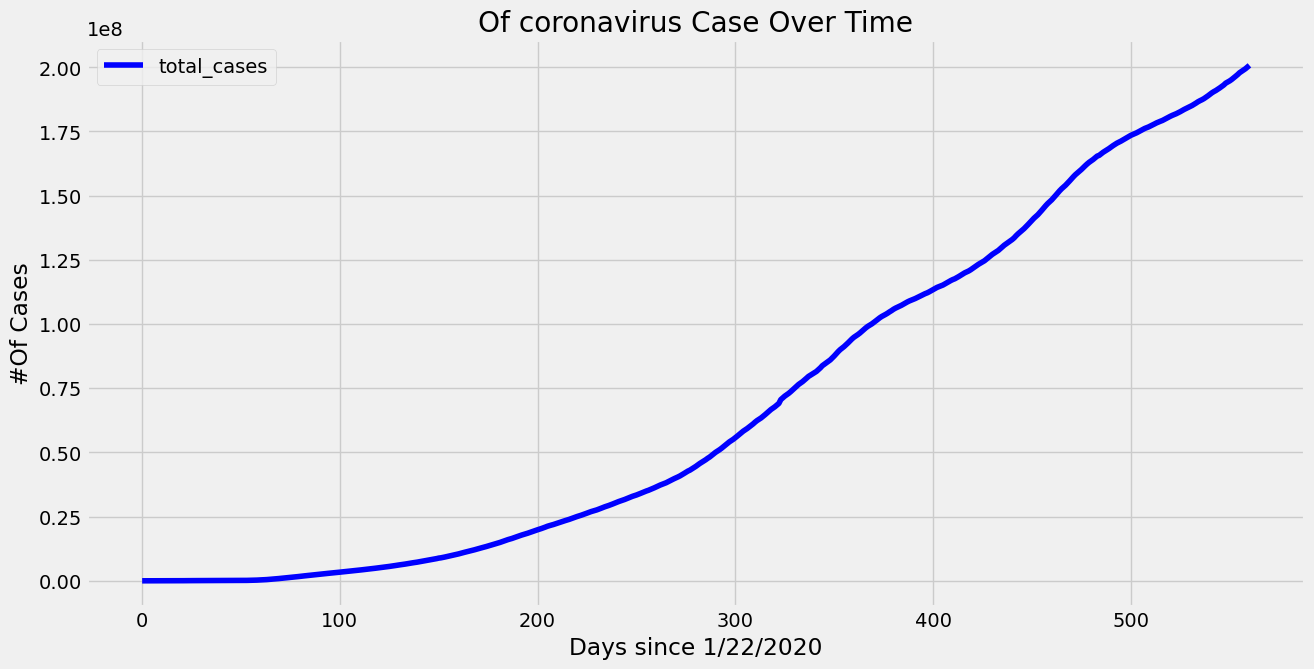

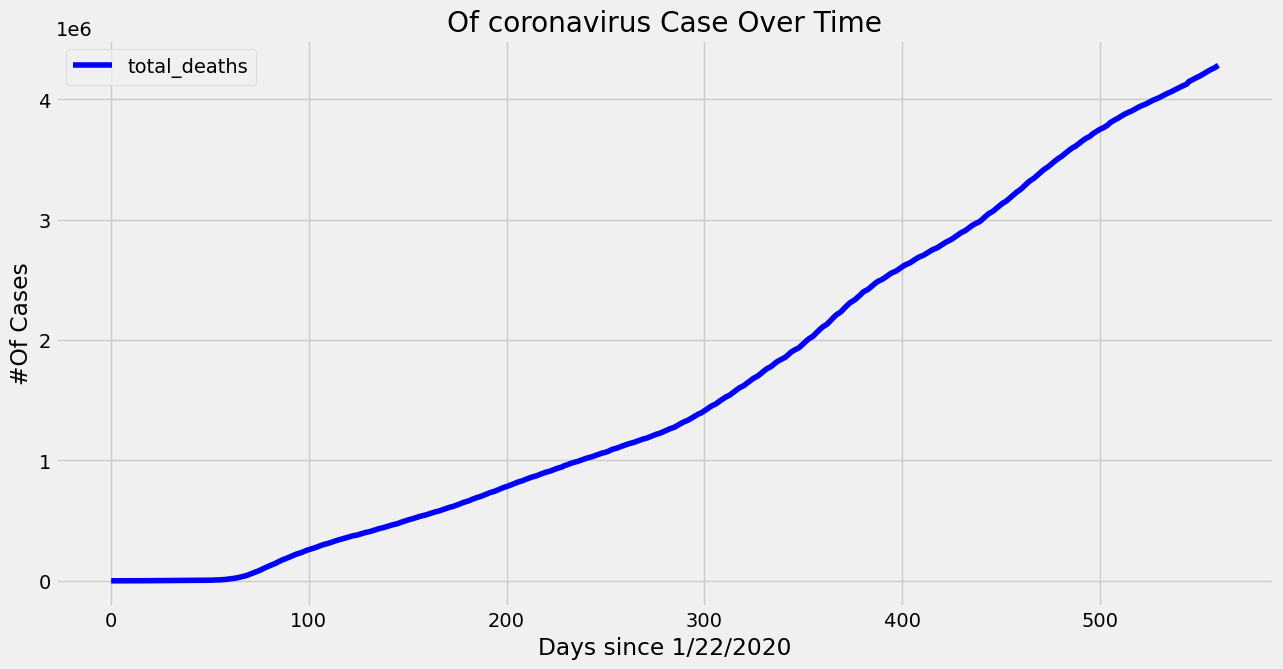

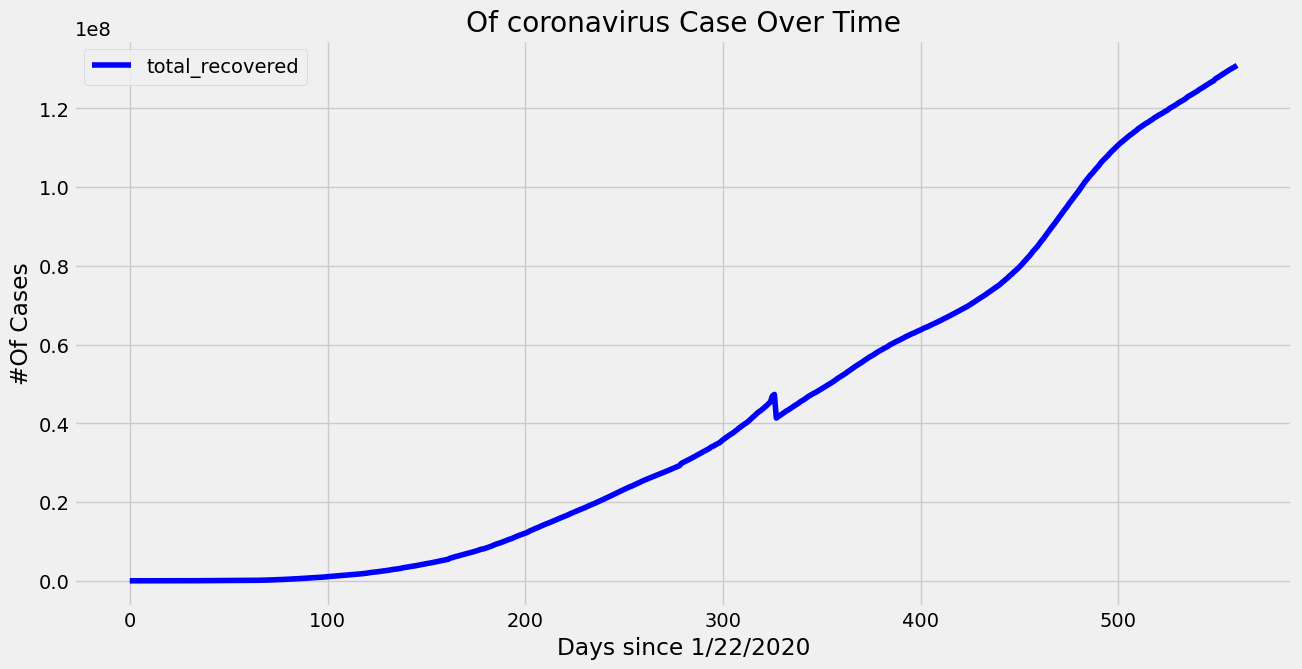

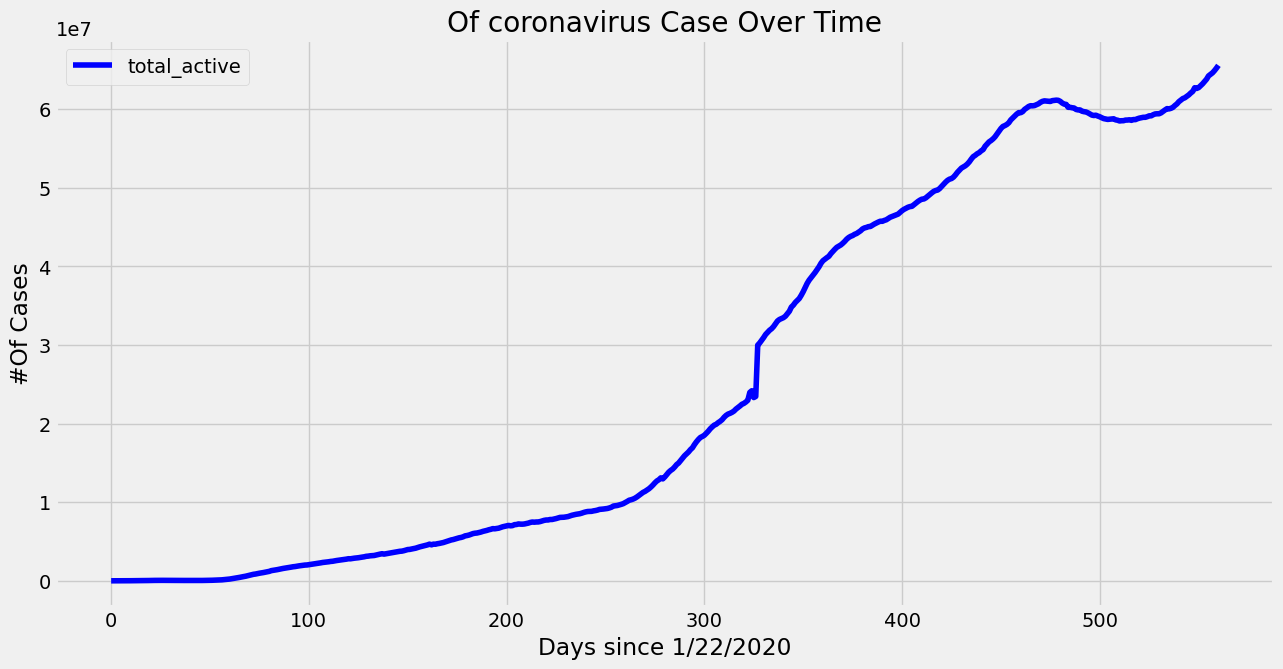

In [39]:
#Linechart of Total Cases
plt.figure(figsize = (14,7))
plt.plot(adjusted_dates, total_cases, label = 'total_cases', color = 'blue')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#Of Cases')
plt.title('Of coronavirus Case Over Time')
plt.legend()
plt.grid(True)
plt.show()

#Linechart of Total Deaths
plt.figure(figsize =(14,7))
plt.plot(adjusted_dates, total_deaths, label = 'total_deaths', color = 'blue')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#Of Cases')
plt.title('Of coronavirus Case Over Time')
plt.legend()
plt.grid(True)
plt.show()

#Linechart of Total Recovered
plt.figure(figsize =(14,7))
plt.plot(adjusted_dates, total_recovered, label = 'total_recovered', color = 'blue')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#Of Cases')
plt.title('Of coronavirus Case Over Time')
plt.legend()
plt.grid(True)
plt.show()

#Linechart of Total Active
plt.figure(figsize =(14,7))
plt.plot(adjusted_dates, total_active, label = 'total_active', color = 'blue')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('#Of Cases')
plt.title('Of coronavirus Case Over Time')
plt.legend()
plt.grid(True)
plt.show()

Câu 13: Tính toán số lượng gia tăng hàng ngày về tổng số ca, tổng số người chết, tổng số người phục hồi và tổng số ca nhiễm đang điều trị theo thời gian (đơn vị ngày).

In [40]:
# Tính số lượng gia tăng hàng ngày
daily_increase_cases = np.diff(total_cases, prepend=0)
daily_increase_deaths = np.diff(total_deaths, prepend=0)
daily_increase_recovered = np.diff(total_recovered, prepend=0)
daily_increase_active = np.diff(total_active, prepend=0)

# Chuyển đổi dữ liệu ngày tháng về dạng ngày
adjusted_dates = pd.to_datetime(dates)

# In ra số liệu cuối cùng để kiểm tra
print("Daily increase in confirmed cases: ", daily_increase_cases[-1])
print("Daily increase in death cases: ", daily_increase_deaths[-1])
print("Daily increase in recovered cases: ", daily_increase_recovered[-1])
print("Daily increase in active cases: ", daily_increase_active[-1])

Daily increase in confirmed cases:  680458
Daily increase in death cases:  10492
Daily increase in recovered cases:  317060
Daily increase in active cases:  352906


Câu 14: Trực quan số lượng gia tăng hàng ngày về tổng số ca, tổng số người chết, tổng số người phục hồi và tổng số ca nhiễm đang 
#điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ thanh (bar chart).

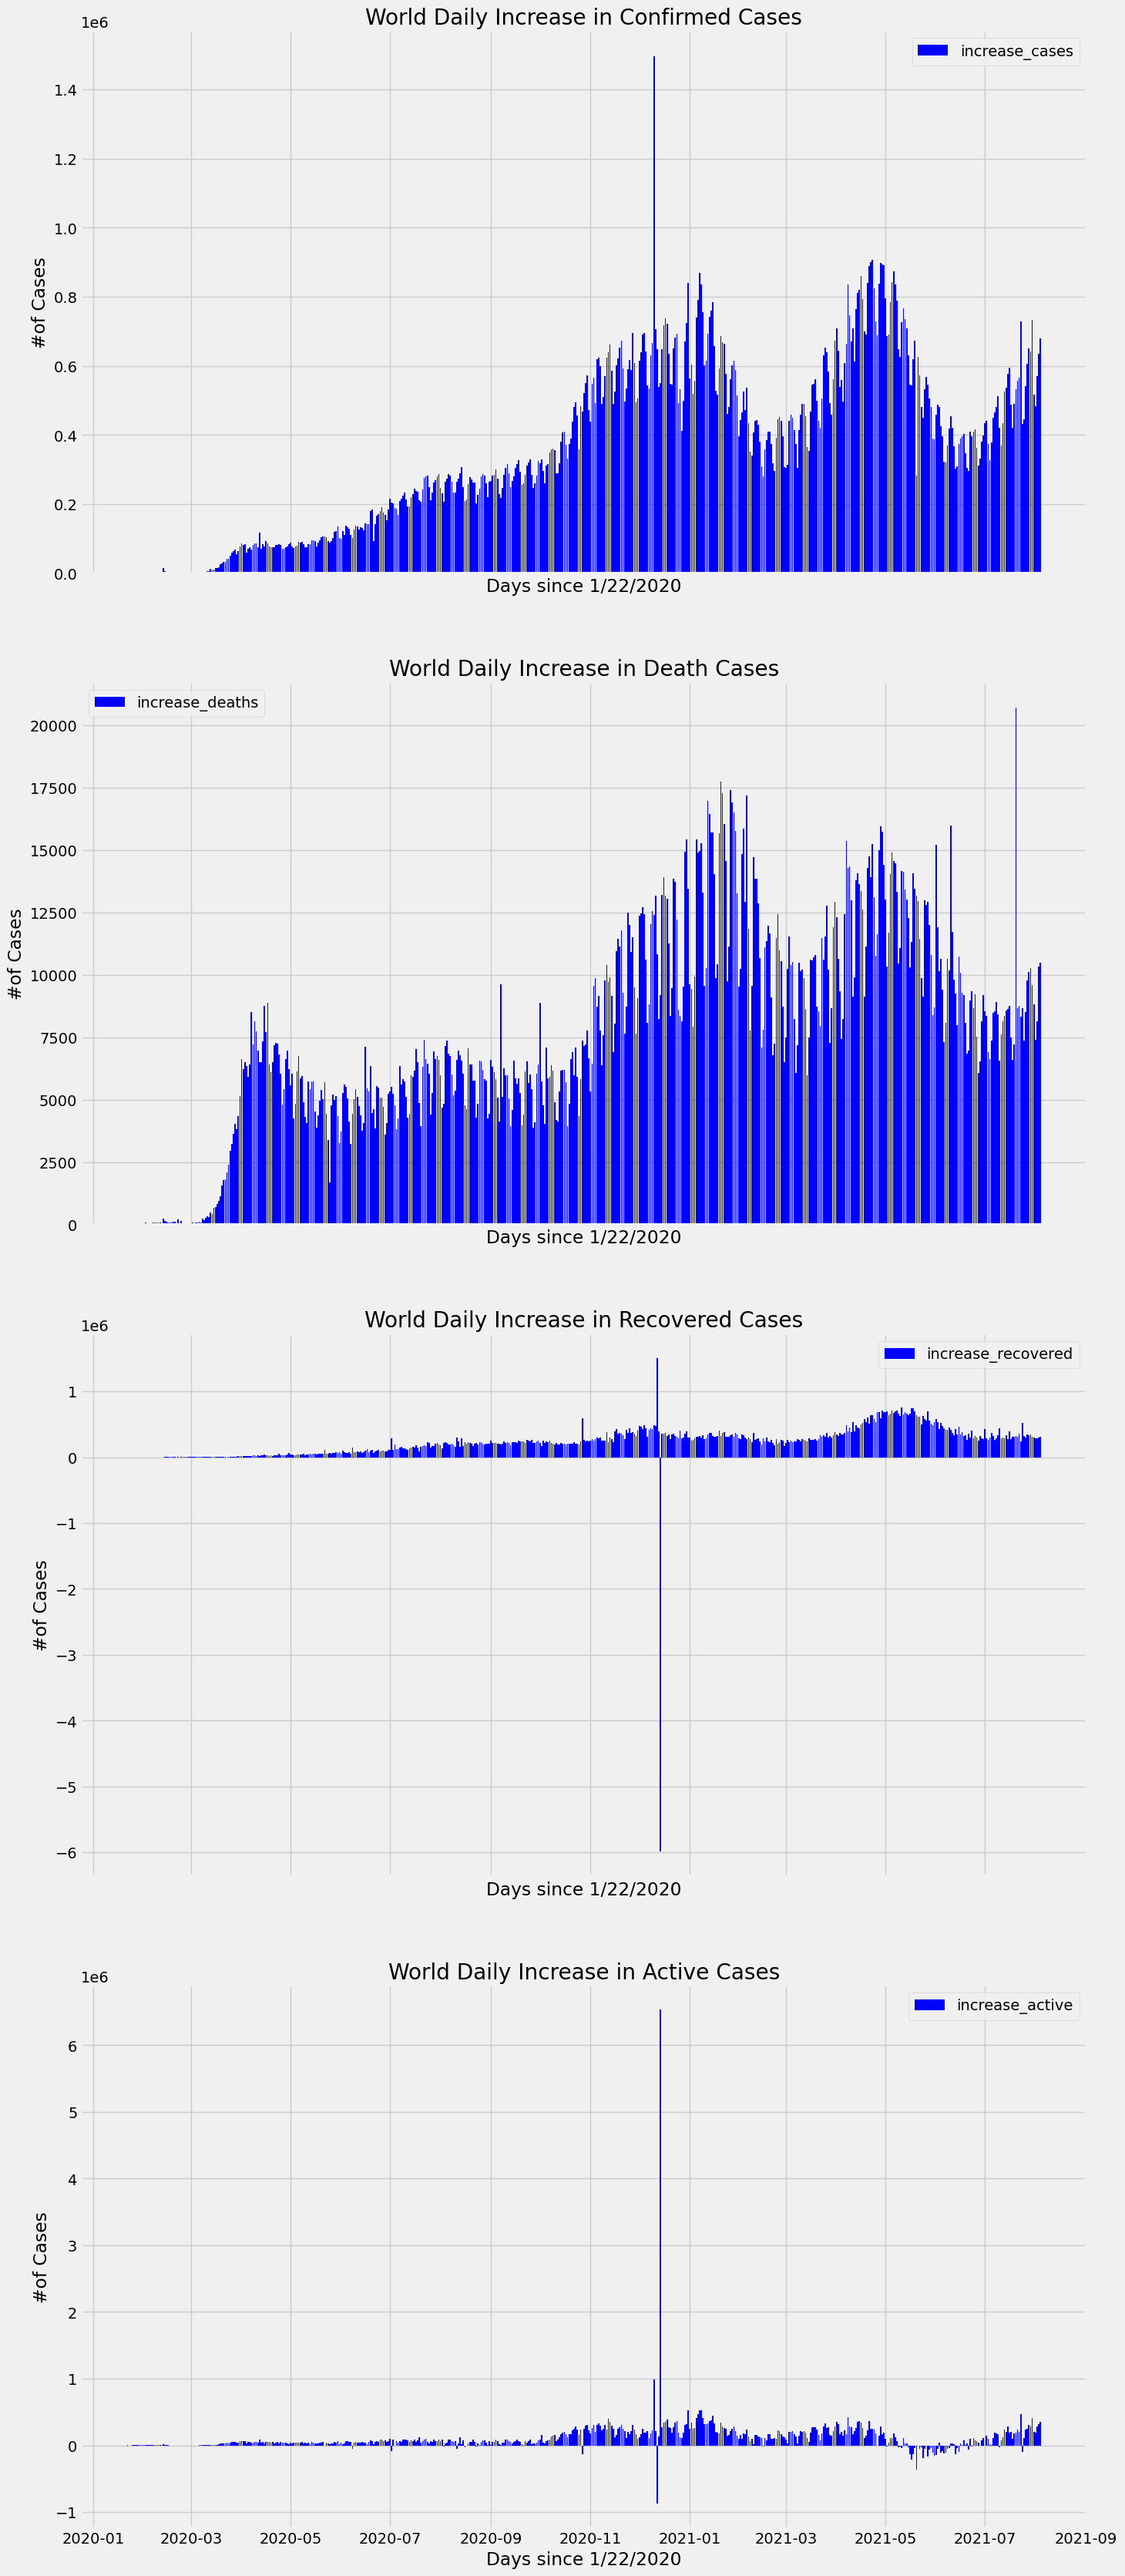

In [41]:
#Bar chart of daily_increase_cases

# Bar chart of daily_increase_cases
fig, axs = plt.subplots(4, 1, figsize=(15, 40), sharex=True)

# Bar chart of daily_increase_cases
axs[0].bar(adjusted_dates, daily_increase_cases, label = 'increase_cases', color='blue')
axs[0].set_xlabel('Days since 1/22/2020')
axs[0].set_ylabel('#of Cases')
axs[0].set_title('World Daily Increase in Confirmed Cases')
axs[0].legend()
axs[0].grid(True)

# Bar chart of daily_increase_deaths
axs[1].bar(adjusted_dates, daily_increase_deaths, label = 'increase_deaths', color='blue')
axs[1].set_xlabel('Days since 1/22/2020')
axs[1].set_ylabel('#of Cases')
axs[1].set_title('World Daily Increase in Death Cases')
axs[1].legend()
axs[1].grid(True)

# Bar chart of daily_increase_recovered
axs[2].bar(adjusted_dates, daily_increase_recovered, label = 'increase_recovered', color='blue')
axs[2].set_xlabel('Days since 1/22/2020')
axs[2].set_ylabel('#of Cases')
axs[2].set_title('World Daily Increase in Recovered Cases')
axs[2].legend()
axs[2].grid(True)

# Bar chart of daily_increase_active
axs[3].bar(adjusted_dates, daily_increase_active, label = 'increase_active', color='blue')
axs[3].set_xlabel('Days since 1/22/2020')
axs[3].set_ylabel('#of Cases')
axs[3].set_title('World Daily Increase in Active Cases')
axs[3].legend()
axs[3].grid(True)

plt.show()

Câu 15: Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [42]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])


for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100)
    recovery_rate.append((total_recovered[-1] / total_cases[-1]) * 100)
    
# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)
average_recovery_rate = np.mean(recovery_rate)

#in các trường dữ liệu đã xử lý

print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])
print("Mortality Rate (%):", mortality_rate[-1])
print("Recovery Rate (%):",  recovery_rate[-1])
print("Average mortality rate (%):", average_mortality_rate)
print("Average recovery rate (%):", average_recovery_rate)

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511
Mortality Rate (%): 2.1334160808104508
Recovery Rate (%): 65.202222382636
Average mortality rate (%): 3.438476174895814
Average recovery rate (%): 52.71640799696072


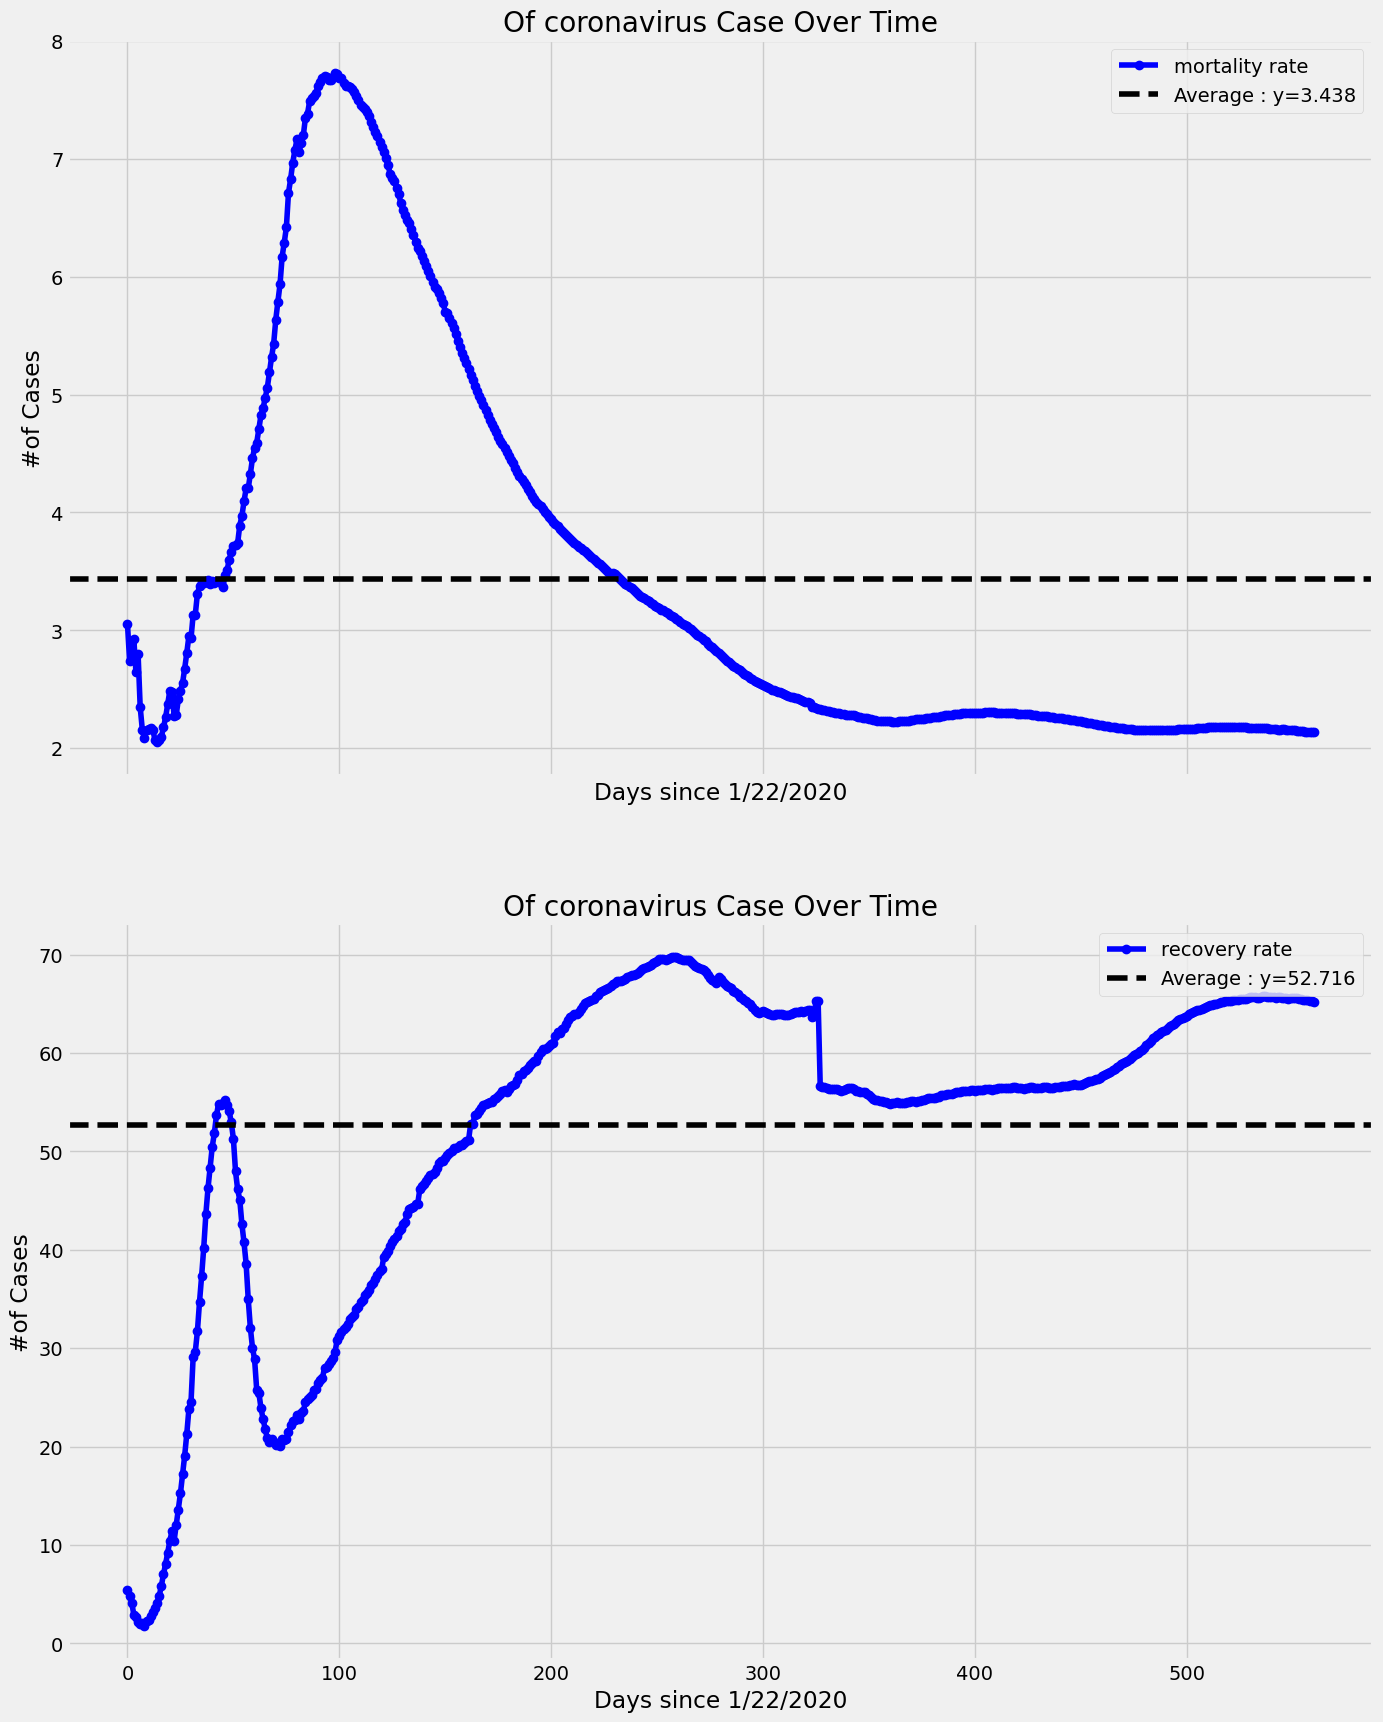

In [43]:
# Trực quan hóa dữ liệu tỷ lệ tử vong và tỷ lệ hồi phục theo thời gian
fig, axs = plt.subplots(2, 1, figsize=(15, 20), sharex=True)

# Biểu đồ tỷ lệ tử vong
axs[0].plot(adjusted_dates, mortality_rate, color='blue', label='mortality rate', marker='o')
axs[0].axhline(y = average_mortality_rate, color='black', linestyle='--', label='Average : y=3.438')
axs[0].set_xlabel('Days since 1/22/2020')
axs[0].set_ylabel('#of Cases')
axs[0].set_title('Of coronavirus Case Over Time')
axs[0].legend()
axs[0].grid(True)

# Biểu đồ tỷ lệ hồi phục
axs[1].plot(adjusted_dates, recovery_rate, color='blue', label = 'recovery rate', marker='o')
axs[1].axhline(y = average_recovery_rate, color = 'black', linestyle = '--', label = 'Average : y=52.716')            
axs[1].set_xlabel('Days since 1/22/2020')
axs[1].set_ylabel('#of Cases')
axs[1].set_title('Of coronavirus Case Over Time')
axs[1].legend()
axs[1].grid(True)

plt.show()

# Phân tích theo lục địa

Tiền Xử Lý Dữ Liệu

In [260]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

Câu 16: Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df.

In [261]:
for df in [confirmed_df, deaths_df, recoveries_df]:
    df['Continent'] = df['Country/Region'].apply(lambda country: continents.get(country_to_continent_code(country), 'Others'))

# Checking results
print("Confirmed DataFrame:")
confirmed_df.head()

print("\nDeaths DataFrame:")
deaths_df.head()

print("\nRecoveries DataFrame:")
recoveries_df.head()

Confirmed DataFrame:

Deaths DataFrame:

Recoveries DataFrame:


,Country/Region,Province/State,level_0,index,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,Continent
0,Afghanistan,Unknown,0,0,33.93911,67.709953,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,Asia
1,Albania,Unknown,1,1,41.15330,20.168300,0,0,0,0,...,130166,130174,130187,130205,130222,130243,130256,130291,130314,Europe
2,Algeria,Unknown,2,2,28.03390,1.659600,0,0,0,0,...,112050,112900,113707,114531,115276,116009,116770,117557,118409,Africa
3,Andorra,Unknown,3,3,42.50630,1.521800,0,0,0,0,...,14113,14113,14180,14210,14210,14210,14296,14348,14380,Europe
4,Angola,Unknown,4,4,-11.20270,17.873900,0,0,0,0,...,35742,35964,36025,36708,37255,37397,38360,39389,39582,Africa


Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
Các thông tin cột này sẽ là:
- continent: Lục địa của quốc gia.
- Deaths: Tổng số ca dương tính.
- Deaths: Tổng số người chết.
- Recoveries: Tổng số ca hồi phục
- Active: Tổng số đang điều trị.
- Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [262]:
# Giả sử confirmed_df, deaths_df, và recoveries_df đã được đọc từ các tập tin CSV và có cấu trúc như đã nêu.
# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán.
confirmed_df.iloc[:, 4:-1] = confirmed_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:-1] = deaths_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:-1] = recoveries_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:-1]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2)
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)
country_df.head()

Confirmed: 200758588
Deaths: 4283016
Recoveries: 130899061.0
Active: 65576511.0
Mortality Rate: 3.7815011263171434


C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2311494414.py:63: RuntimeWarning:

divide by zero encountered in divide

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2311494414.py:63: RuntimeWarning:

invalid value encountered in divide



,Continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148933,6836,82586.0,59511.0,4.59
Albania,Europe,133310,2457,130314.0,539.0,1.84
Algeria,Africa,176724,4404,118409.0,53911.0,2.49
Andorra,Europe,14797,128,14380.0,289.0,0.87
Angola,Africa,43158,1026,39582.0,2550.0,2.38


In [193]:
# Replace NaN values with 0 (or another appropriate value) if necessary
country_df['Recoveries'] = country_df['Recoveries'].fillna(0)

# Convert 'Recoveries' column to integer type
country_df['Recoveries'] = country_df['Recoveries'].astype(int)
country_df.head()

# Replace NaN values with 0 (or another appropriate value) if necessary
country_df['Active'] = country_df['Active'].fillna(0)

# Convert 'Recoveries' column to integer type
country_df['Active'] = country_df['Active'].astype(int)
country_df.head()

,Continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148933,6836,82586,59511,4.59
Albania,Europe,133310,2457,130314,539,1.84
Algeria,Africa,176724,4404,118409,53911,2.49
Andorra,Europe,14797,128,14380,289,0.87
Angola,Africa,43158,1026,39582,2550,2.38


Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
Các thông tin cột này sẽ là:

 - Confirmed: Đất nước lục địa.
 - Deaths: Tổng số người chết.
 - Recoveries: Tổng số lần khôi phục.
 - Active: Tổng số đang điều trị.
 - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [199]:
import pandas as pd
import numpy as np

# Assume country_df is already created and contains 'Continent' and the relevant data

# Group by continent and aggregate the data
continental_df = country_df.groupby('Continent').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recoveries': 'sum'
})

# Calculate Active cases and Mortality Rate
continental_df['Active'] = continental_df['Confirmed'] - continental_df['Deaths'] - continental_df['Recoveries']
continental_df['Mortality Rate'] = np.round((continental_df['Deaths'] / continental_df['Confirmed']) * 100, 2)

# Reorder columns to match the desired output
continental_df = continental[['Confirmed', 'Deaths', 'Recoveries', 'Active', 'Mortality Rate']]

# Display the final DataFrame
continental_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6855602,174000,51811682,-45130080,2.54
Asia,62536726,902952,17011297,44622477,1.44
Australia,90000,1425,5594246,-5505671,1.58
Europe,52448545,1167140,19516118,31765287,2.23
North America,42351963,924518,11308667,30118778,2.18
Others,753558,16614,1548018,-811074,2.20
South America,35722194,1096367,24109033,10516794,3.07


In [203]:
import pandas as pd
import numpy as np

# Assume country_df is already created and contains 'Continent' and the relevant data

# Group by continent and aggregate the data
continental_df = country_df.groupby('Continent').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recoveries': 'sum'
})

# Calculate Active cases and Mortality Rate
continental_df['Active'] = continental_df['Confirmed'] - continental_df['Deaths'] - continental_df['Recoveries']
continental_df['Mortality Rate'] = np.round((continental_df['Deaths'] / continental_df['Confirmed']) * 100, 2)

# Reorder columns to match the desired output
continental_df = continental[['Confirmed', 'Deaths', 'Recoveries', 'Active', 'Mortality Rate']]

# Display the final DataFrame
continental_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6855602,174000,51811682,-45130080,2.54
Asia,62536726,902952,17011297,44622477,1.44
Australia,90000,1425,5594246,-5505671,1.58
Europe,52448545,1167140,19516118,31765287,2.23
North America,42351963,924518,11308667,30118778,2.18
Others,753558,16614,1548018,-811074,2.20
South America,35722194,1096367,24109033,10516794,3.07


In [202]:
continental_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6855602,174000,51811682,-45130080,2.54
Asia,62536726,902952,17011297,44622477,1.44
Australia,90000,1425,5594246,-5505671,1.58
Europe,52448545,1167140,19516118,31765287,2.23
North America,42351963,924518,11308667,30118778,2.18
Others,753558,16614,1548018,-811074,2.20
South America,35722194,1096367,24109033,10516794,3.07


Confirmed: 0.0
Deaths: 0.0
Recoveries: 0.0
Active: 0.0
Mortality Rate: 3.7747963370860846
           Confirmed  Deaths  Recoveries  Active  Mortality Rate
Continent                                                       
0.0              0.0     0.0         0.0     0.0             NaN


C:\Users\datng\AppData\Local\Temp\ipykernel_8920\1164268235.py:67: RuntimeWarning:

invalid value encountered in divide

Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999

Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.999999999997

Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.999999999997

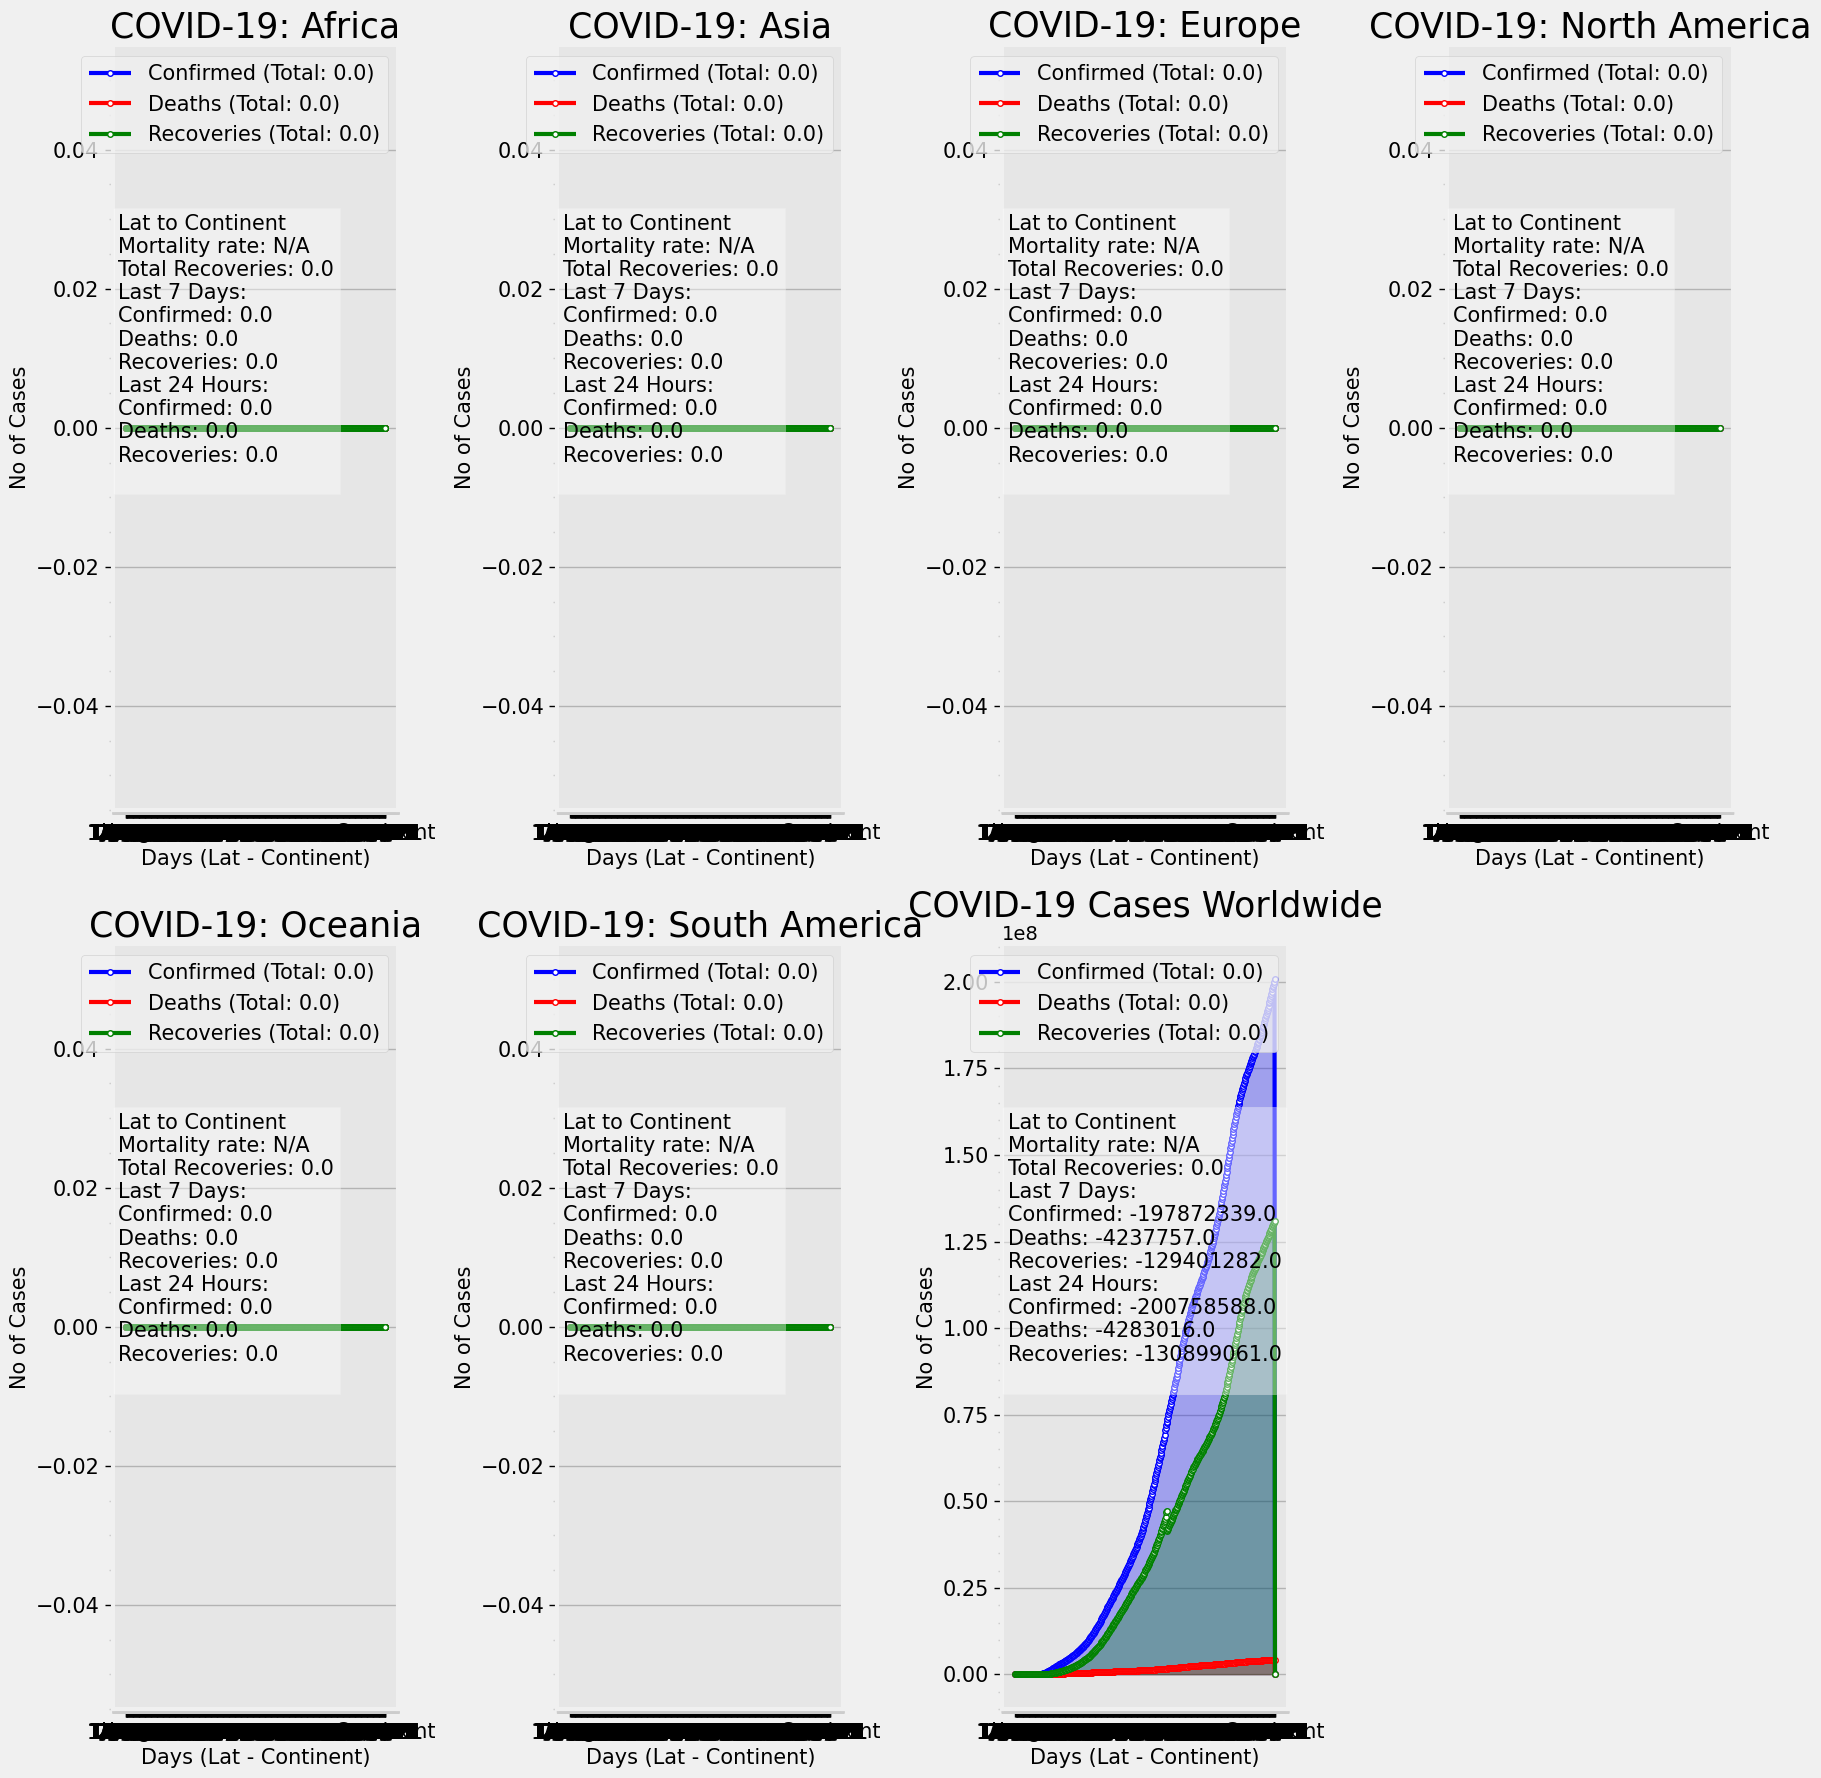

           Confirmed  Deaths  Recoveries  Active  Mortality Rate
Continent                                                       
0.0              0.0     0.0         0.0     0.0             NaN


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán
confirmed_df.iloc[:, 4:] = confirmed_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:] = deaths_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:] = recoveries_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2)
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)

# Aggregate data by continent
continent_df = country_df.groupby('Continent').sum()

# Tính toán tỷ lệ tử vong cho mỗi châu lục
continent_df['Mortality Rate'] = np.round((continent_df['Deaths'] / continent_df['Confirmed']) * 100, 2)

# In kết quả
print(continent_df)

# Chức năng để thiết lập các tham số đồ thị
def plot_params(ax, axis_label=None, plt_title=None, label_size=15, axis_fsize=15, title_fsize=20, scale='linear'):
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    ax.grid(lw=1, ls='-', c="0.7", which='major')
    ax.grid(lw=1, ls='-', c="0.9", which='minor')

    ax.set_title(plt_title, fontsize=title_fsize)
    ax.set_yscale(scale)
    ax.minorticks_on()
    ax.set_xlabel(axis_label[0], fontsize=axis_fsize)
    ax.set_ylabel(axis_label[1], fontsize=axis_fsize)

# Chức năng để trực quan hóa các trường hợp COVID-19
def visualize_covid_cases(confirmed, deaths, recoveries, continent=None, scale="linear", figure=None, subplot_position=None):
    if figure is None:
        f, ax = plt.subplots(figsize=(10, 10))
    else:
        f, ax = figure, figure.add_subplot(subplot_position)
        
    ax.set_axisbelow(True)
    
    stats = [confirmed, deaths, recoveries]
    labels = ["Confirmed", "Deaths", "Recoveries"]
    colors = ["blue", "red", "green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o', markersize=4, markerfacecolor='#ffffff')

    for i, stat in enumerate(stats):
        if continent == "All":
            cases = np.sum(np.asarray(stat.iloc[:, 4:]), axis=0)
        else:
            cases = np.sum(np.asarray(stat[stat['Continent'] == continent].iloc[:, 4:]), axis=0)
        dates = stat.columns[4:]
        ax.plot(dates, cases, label=f"{labels[i]} (Total: {cases[-1]})", color=colors[i], **marker_style)
        ax.fill_between(dates, cases, color=colors[i], alpha=0.3)
    
    if continent == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:, 4:]), axis=0)
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:, 4:]), axis=0)
        Total_recovered = np.sum(np.asarray(stats[2].iloc[:, 4:]), axis=0)
    else:
        Total_confirmed = np.sum(np.asarray(stats[0][stats[0]['Continent'] == continent].iloc[:, 4:]), axis=0)
        Total_deaths = np.sum(np.asarray(stats[1][stats[1]['Continent'] == continent].iloc[:, 4:]), axis=0)
        Total_recovered = np.sum(np.asarray(stats[2][stats[2]['Continent'] == continent].iloc[:, 4:]), axis=0)

    text = f"{dates[0]} to {dates[-1]}\n"
    text += f"Mortality rate: {int(Total_deaths[-1] / Total_confirmed[-1] * 10000) / 100}%\n" if Total_confirmed[-1] > 0 else "Mortality rate: N/A\n"
    text += f"Total Recoveries: {Total_recovered[-1]}\n"
    text += f"Last 7 Days:\nConfirmed: {Total_confirmed[-1] - Total_confirmed[-7]}\nDeaths: {Total_deaths[-1] - Total_deaths[-7]}\nRecoveries: {Total_recovered[-1] - Total_recovered[-7]}\n"
    text += f"Last 24 Hours:\nConfirmed: {Total_confirmed[-1] - Total_confirmed[-2]}\nDeaths: {Total_deaths[-1] - Total_deaths[-2]}\nRecoveries: {Total_recovered[-1] - Total_recovered[-2]}\n"

    ax.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.4))
    
    axis_label = [f"Days ({dates[0]} - {dates[-1]})", "No of Cases"]
    plot_params(ax, axis_label, scale=scale)

    if continent == "All":
        ax.set_title("COVID-19 Cases Worldwide", fontsize=25)
    else:
        ax.set_title(f"COVID-19: {continent}", fontsize=25)

    ax.legend(loc="best", fontsize=15)

    if figure is None:
        plt.show()

# Chọn số lượng châu lục để vẽ đồ thị
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'All']

# Tạo đồ thị cho từng châu lục
fig = plt.figure(figsize=(18, 18))
for i, continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent=continent, figure=fig, subplot_position=241+i)

plt.tight_layout()
plt.show()

# Group by continent and aggregate the data
continent_df = country_df.groupby('Continent').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recoveries': 'sum'
})

# Calculate Active cases and Mortality Rate
continent_df['Active'] = continent_df['Confirmed'] - continent_df['Deaths'] - continent_df['Recoveries']
continent_df['Mortality Rate'] = np.round((continent_df['Deaths'] / continent_df['Confirmed']) * 100, 2)

# Reorder columns to match the desired output
continent_df = continent_df[['Confirmed', 'Deaths', 'Recoveries', 'Active', 'Mortality Rate']]

# Display the final DataFrame
print(continent_df)

11.2 Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
- Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
 - Thêm "Recoveries line" vào biểu đồ chính.
 - Thêm số "Total Recoveries" vào bảng nhỏ.
 - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2082982011.py:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2082982011.py:8: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2082982011.py:9: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

Confirmed: 0.0
Deaths: 0.0
Recoveries: 0.0
Active: 0.0
Mortality Rate: 3.7747963370860846
           Confirmed  Deaths  Recoveries  Active  Mortality Rate
Continent                                                       
0.0              0.0     0.0         0.0     0.0             NaN


Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.999999999997

Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.999999999997

Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.9999999999978]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3096 ticks ([-28.0, ..., 590.999999999997

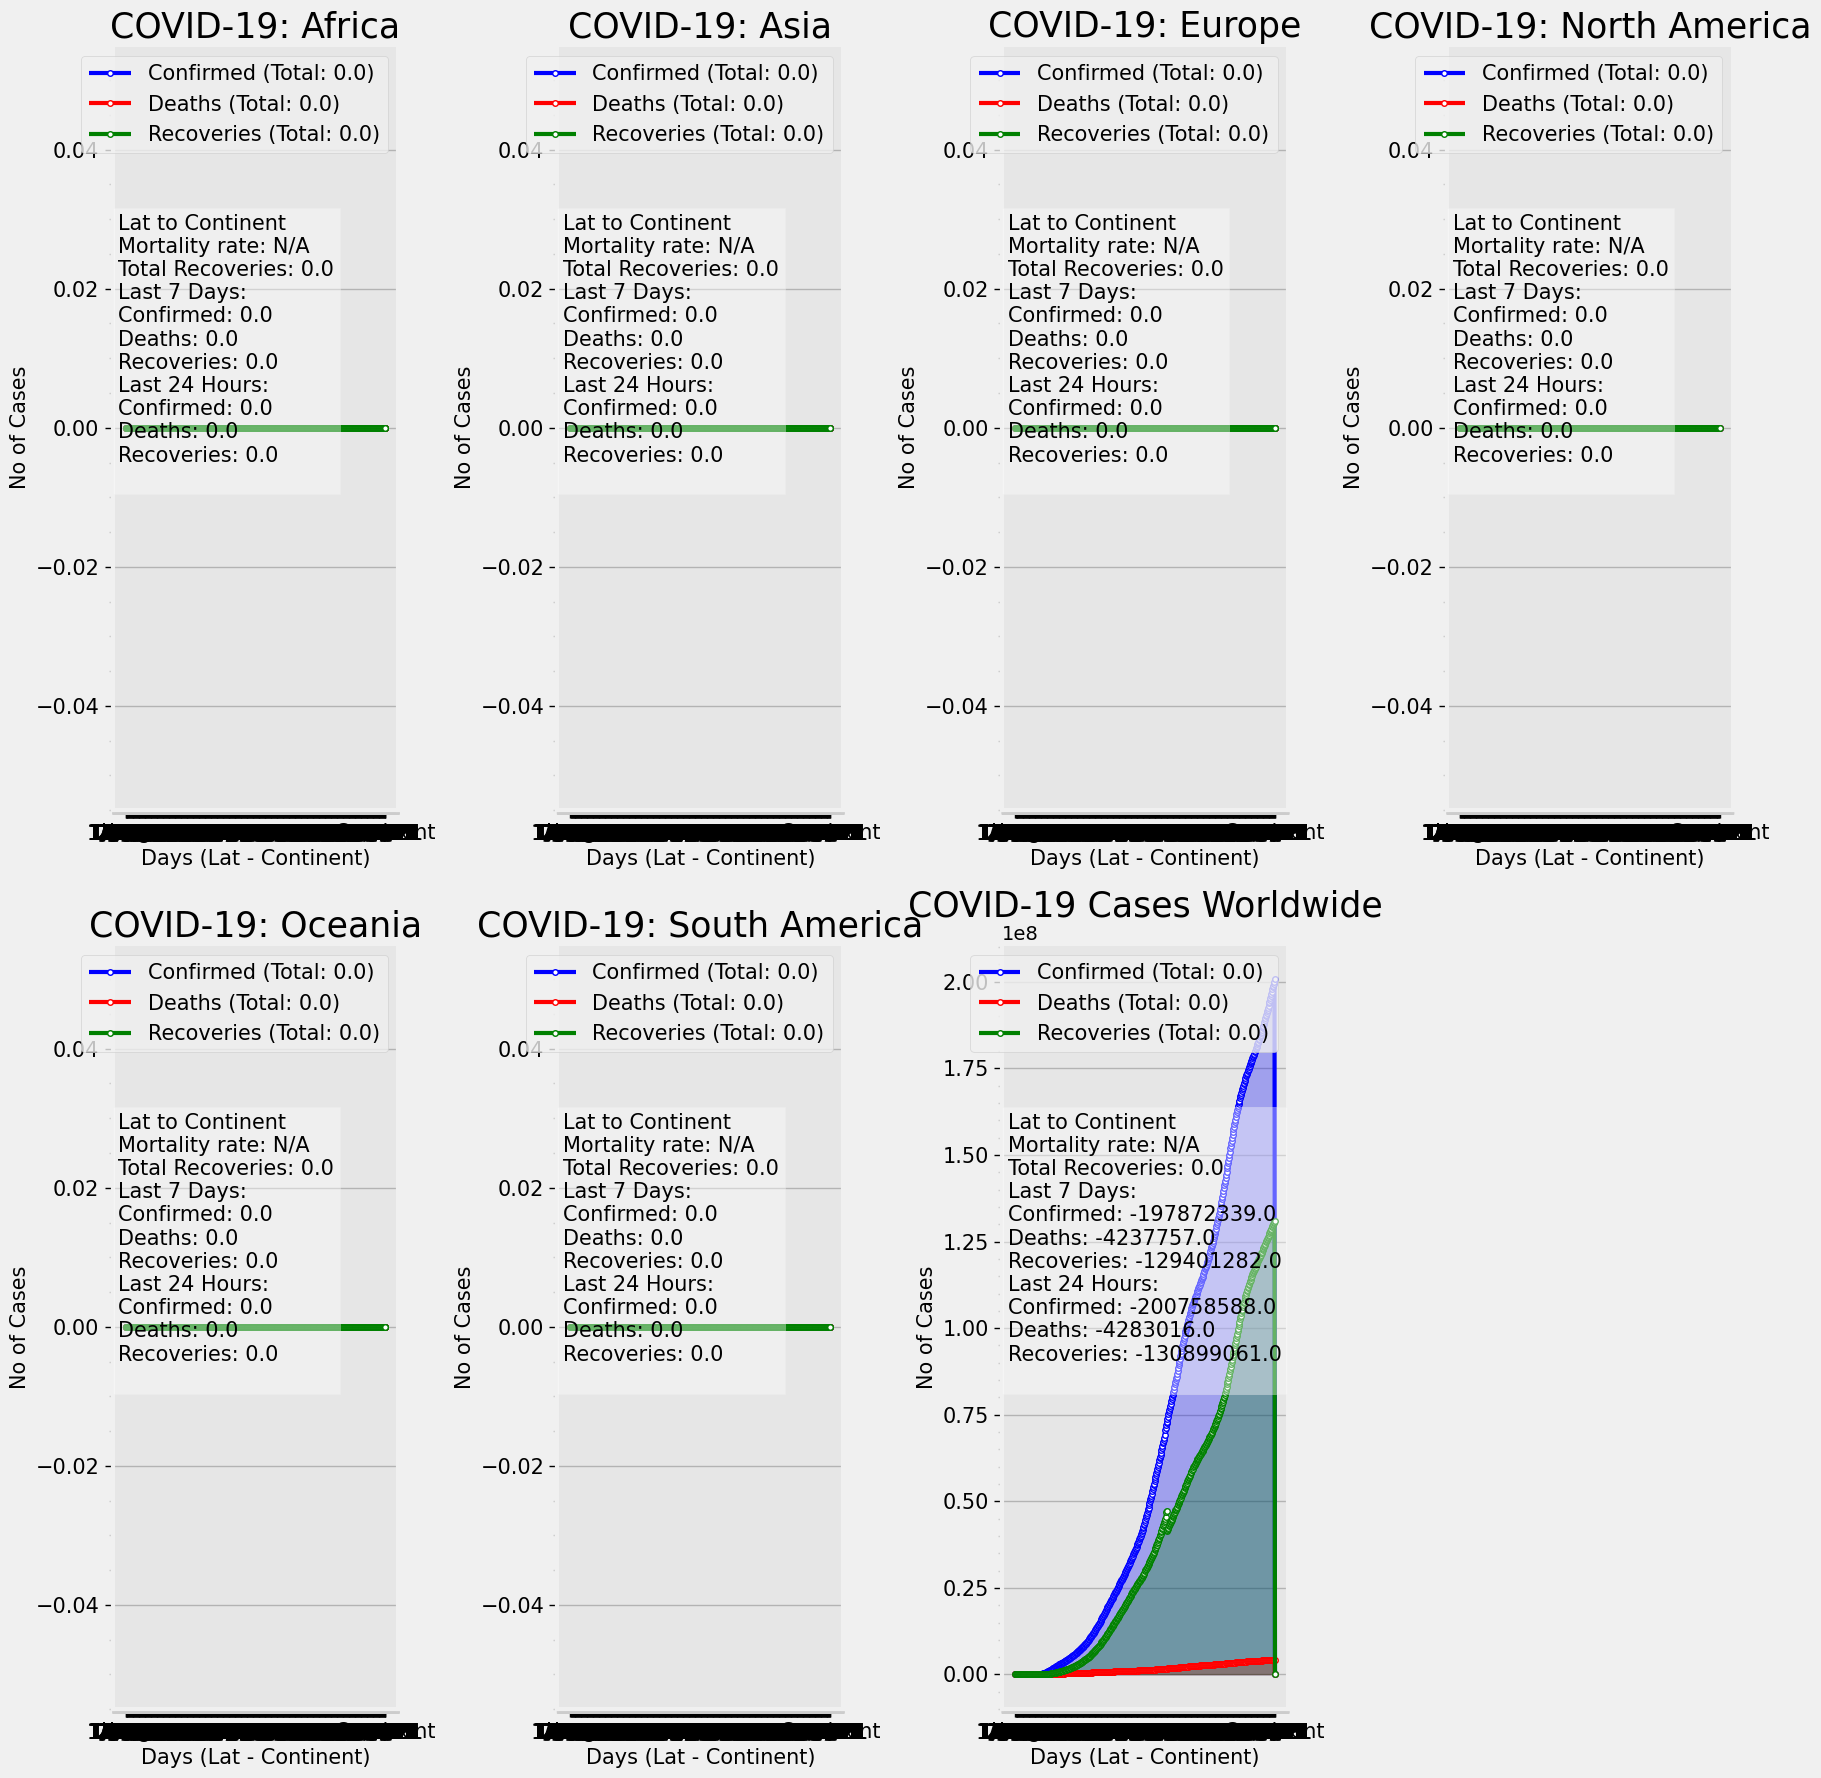

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán
confirmed_df.iloc[:, 4:] = confirmed_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:] = deaths_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:] = recoveries_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2)
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)

# Aggregate data by continent
continent_df = country_df.groupby('Continent').sum()

# Tính toán tỷ lệ tử vong cho mỗi châu lục
continent_df['Mortality Rate'] = np.round((continent_df['Deaths'] / continent_df['Confirmed']) * 100, 2)

# In kết quả
print(continent_df)

# Chức năng để thiết lập các tham số đồ thị
def plot_params(ax, axis_label=None, plt_title=None, label_size=15, axis_fsize=15, title_fsize=20, scale='linear'):
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    ax.grid(lw=1, ls='-', c="0.7", which='major')
    ax.grid(lw=1, ls='-', c="0.9", which='minor')

    ax.set_title(plt_title, fontsize=title_fsize)
    ax.set_yscale(scale)
    ax.minorticks_on()
    ax.set_xlabel(axis_label[0], fontsize=axis_fsize)
    ax.set_ylabel(axis_label[1], fontsize=axis_fsize)

# Chức năng để trực quan hóa các trường hợp COVID-19
def visualize_covid_cases(confirmed, deaths, recoveries, continent=None, scale="linear", figure=None, subplot_position=None):
    if figure is None:
        f, ax = plt.subplots(figsize=(10, 10))
    else:
        f, ax = figure, figure.add_subplot(subplot_position)
        
    ax.set_axisbelow(True)
    
    stats = [confirmed, deaths, recoveries]
    labels = ["Confirmed", "Deaths", "Recoveries"]
    colors = ["blue", "red", "green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o', markersize=4, markerfacecolor='#ffffff')

    for i, stat in enumerate(stats):
        if continent == "All":
            cases = np.sum(np.asarray(stat.iloc[:, 4:]), axis=0)
        else:
            cases = np.sum(np.asarray(stat[stat['Continent'] == continent].iloc[:, 4:]), axis=0)
        dates = stat.columns[4:]
        ax.plot(dates, cases, label=f"{labels[i]} (Total: {cases[-1]})", color=colors[i], **marker_style)
        ax.fill_between(dates, cases, color=colors[i], alpha=0.3)
    
    if continent == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:, 4:]), axis=0)
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:, 4:]), axis=0)
        Total_recovered = np.sum(np.asarray(stats[2].iloc[:, 4:]), axis=0)
    else:
        Total_confirmed = np.sum(np.asarray(stats[0][stats[0]['Continent'] == continent].iloc[:, 4:]), axis=0)
        Total_deaths = np.sum(np.asarray(stats[1][stats[1]['Continent'] == continent].iloc[:, 4:]), axis=0)
        Total_recovered = np.sum(np.asarray(stats[2][stats[2]['Continent'] == continent].iloc[:, 4:]), axis=0)

    text = f"{dates[0]} to {dates[-1]}\n"
    text += f"Mortality rate: {int(Total_deaths[-1] / Total_confirmed[-1] * 10000) / 100}%\n" if Total_confirmed[-1] > 0 else "Mortality rate: N/A\n"
    text += f"Total Recoveries: {Total_recovered[-1]}\n"
    text += f"Last 7 Days:\nConfirmed: {Total_confirmed[-1] - Total_confirmed[-7]}\nDeaths: {Total_deaths[-1] - Total_deaths[-7]}\nRecoveries: {Total_recovered[-1] - Total_recovered[-7]}\n"
    text += f"Last 24 Hours:\nConfirmed: {Total_confirmed[-1] - Total_confirmed[-2]}\nDeaths: {Total_deaths[-1] - Total_deaths[-2]}\nRecoveries: {Total_recovered[-1] - Total_recovered[-2]}\n"

    ax.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.4))
    
    axis_label = [f"Days ({dates[0]} - {dates[-1]})", "No of Cases"]
    plot_params(ax, axis_label, scale=scale)

    if continent == "All":
        ax.set_title("COVID-19 Cases Worldwide", fontsize=25)
    else:
        ax.set_title(f"COVID-19: {continent}", fontsize=25)

    ax.legend(loc="best", fontsize=15)

    if figure is None:
        plt.show()

# Chọn số lượng châu lục để vẽ đồ thị
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'All']

# Tạo đồ thị cho từng châu lục
fig = plt.figure(figsize=(18, 18))
for i, continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent=continent, figure=fig, subplot_position=241+i)

plt.tight_layout()
plt.show()

In [135]:
def visualize_covid_cases(confirmed, deaths, recoveries, continent):
    # Lấy các ngày gần nhất
    dates = confirmed.columns[-7:]
    
    # Tính toán tổng số, tổng số tử vong, tổng số hồi phục, tổng số đang điều trị và tỷ lệ tử vong trung bình
    total_cases = confirmed.iloc[:, -7:].sum()
    total_deaths = deaths.iloc[:, -7:].sum()
    total_recoveries = recoveries.iloc[:, -7:].sum()
    total_active = total_cases - total_deaths - total_recoveries
    average_mortality_rate = (total_deaths / total_cases) * 100 if total_cases > 0 else 0
    
    # Tạo biểu đồ
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Gọi hàm plot_params để vẽ biểu đồ
    plot_params(ax, dates, total_cases, total_deaths, total_recoveries, total_active, continent, average_mortality_rate)
    
    plt.tight_layout()
    plt.show()

# Trực quan hóa ma trận tương quan của continents_df.

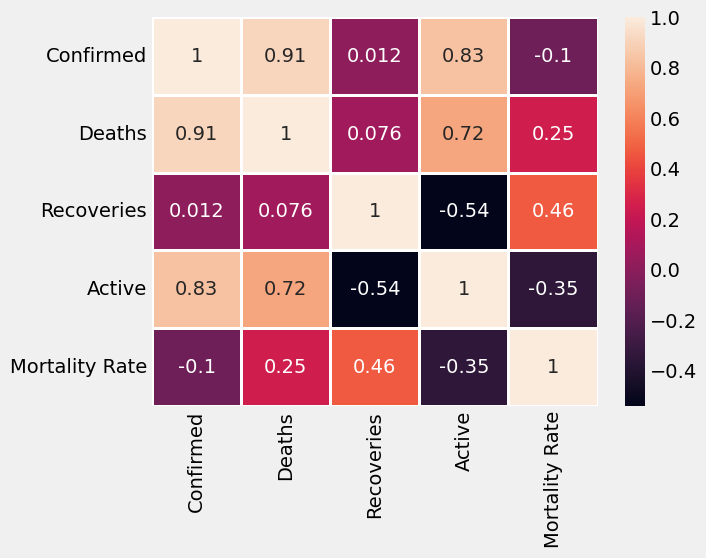

<Figure size 1200x1000 with 0 Axes>

In [176]:
# Vẽ heatmap
correlation_matrix = continental_df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True, linewidths=.8)

plt.figure(figsize=(12, 10))

plt.show()

Bài toán 13

Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

In [177]:
continental_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6855602,174000,51811682,-45130080,2.54
Asia,62536726,902952,17011297,44622477,1.44
Australia,90000,1425,5594246,-5505671,1.58
Europe,52448545,1167140,19516118,31765287,2.23
North America,42351963,924518,11308667,30118778,2.18
Others,753558,16614,1548018,-811074,2.20
South America,35722194,1096367,24109033,10516794,3.07


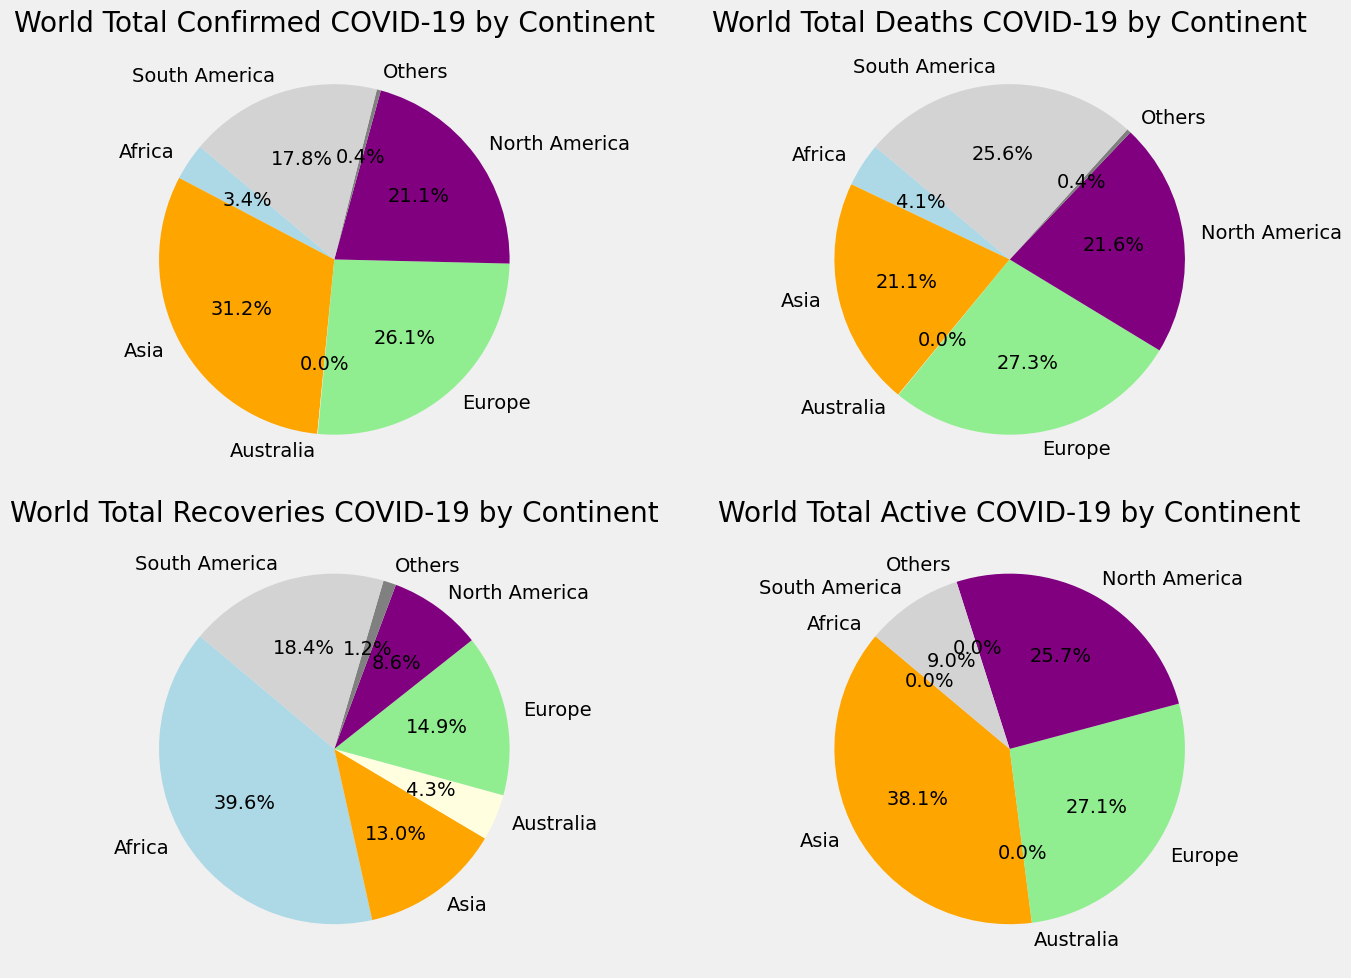

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for the continents
colors = {
    'Africa': 'lightblue',
    'Asia': 'orange',
    'Australia': 'lightyellow',
    'Europe': 'lightgreen',
    'North America': 'purple',
    'Others': 'gray',
    'South America': 'lightgray'
}

# Metrics to plot
metrics = ['Confirmed', 'Deaths', 'Recoveries', 'Active']

# Create a subplot for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Replace NaNs with 0 and ensure no negative values
for metric in metrics:
    continental_df[metric] = continental_df[metric].fillna(0).clip(lower=0)

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.pie(
        continental_df[metric],
        labels=continental_df.index,
        colors=[colors[continent] for continent in continental_df.index],
        autopct='%1.1f%%',
        startangle=140
    )
    ax.set_title(f'World Total {metric} COVID-19 by Continent')

# Adjust layout
plt.tight_layout()
plt.show()

# Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.


In [235]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [239]:
# Giả sử confirmed_df, deaths_df, và recoveries_df đã được đọc từ các tập tin CSV và có cấu trúc như đã nêu.
# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán.
confirmed_df.iloc[:, 4:-1] = confirmed_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:-1] = deaths_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:-1] = recoveries_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:-1]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2),
    'Latitute': confirmed_df['Lat'],
    'Longtitute': confirmed_df['Long']
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)
country_df

Confirmed: 200758588
Deaths: 4283016
Recoveries: 130899061.0
Active: 65576511.0
Mortality Rate: 3.7815011263171434


C:\Users\datng\AppData\Local\Temp\ipykernel_8920\317565504.py:63: RuntimeWarning:

divide by zero encountered in divide

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\317565504.py:63: RuntimeWarning:

invalid value encountered in divide



,Continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Latitute,Longtitute
Country/Region,,,,,,,,
Afghanistan,Asia,148933,6836,82586.0,59511.0,4.59,33.939110,67.709953
Albania,Europe,133310,2457,130314.0,539.0,1.84,41.153300,20.168300
Algeria,Africa,176724,4404,118409.0,53911.0,2.49,28.033900,1.659600
Andorra,Europe,14797,128,14380.0,289.0,0.87,42.506300,1.521800
Angola,Africa,43158,1026,39582.0,2550.0,2.38,-11.202700,17.873900
...,...,...,...,...,...,...,...,...
West Bank and Gaza,Others,317404,3609,NaN,NaN,1.14,31.952200,35.233200
Winter Olympics 2022,Others,0,0,NaN,NaN,NaN,39.904200,116.407400
Yemen,Asia,7096,1380,NaN,NaN,19.45,15.552727,48.516388


In [245]:
import folium
import pandas as pd
import numpy as np

# Giả sử confirmed_df, deaths_df, và recoveries_df đã được đọc từ các tập tin CSV
# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán
confirmed_df.iloc[:, 4:-1] = confirmed_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:-1] = deaths_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:-1] = recoveries_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:-1]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2),
    'Latitude': confirmed_df['Lat'],  # Sửa chính tả
    'Longitude': confirmed_df['Long']  # Sửa chính tả
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)

# Tạo bản đồ trung tâm tại tọa độ trung bình
map_center = [country_df['Latitude'].mean(), country_df['Longitude'].mean()]  # Đảm bảo trung tâm tọa độ đúng
mymap = folium.Map(location=map_center, zoom_start=2)

# Thêm các vòng tròn cho mỗi quốc gia
for _, row in country_df.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],  # Sửa chính tả
        radius=row['Confirmed'] / 1000,  # Tùy chỉnh tỷ lệ bán kính phù hợp
        color='grey',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6,
        popup=folium.Popup(
            f"Country: {row.name}<br>"
            f"Confirmed: {row['Confirmed']}<br>"
            f"Deaths: {row['Deaths']}<br>"
            f"Recoveries: {row['Recoveries']}<br>"
            f"Active: {row['Active']}<br>"
            f"Mortality Rate: {row['Mortality Rate']}%",
            max_width=300
        )
    ).add_to(mymap)

# Lưu bản đồ vào tệp HTML
mymap.save('covid19_map.html')


Confirmed: 200758588
Deaths: 4283016
Recoveries: 130899061.0
Active: 65576511.0
Mortality Rate: 3.7815011263171434


C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2514372814.py:67: RuntimeWarning:

divide by zero encountered in divide

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2514372814.py:67: RuntimeWarning:

invalid value encountered in divide



In [197]:
# Chọn 10 quốc gia hàng đầu dựa trên số lượng ca dương tính
import pandas as pd
import numpy as np

# Giả sử confirmed_df, deaths_df, và recoveries_df đã được đọc từ các tập tin CSV và có cấu trúc như đã nêu.
# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán.
confirmed_df.iloc[:, 4:-1] = confirmed_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:-1] = deaths_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:-1] = recoveries_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:-1]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2),
    'Latitute': confirmed_df['Lat'],
    'Longtitute': confirmed_df['Long']
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)

In [205]:
continental_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6855602,174000,51811682,-45130080,2.54
Asia,62536726,902952,17011297,44622477,1.44
Australia,90000,1425,5594246,-5505671,1.58
Europe,52448545,1167140,19516118,31765287,2.23
North America,42351963,924518,11308667,30118778,2.18
Others,753558,16614,1548018,-811074,2.20
South America,35722194,1096367,24109033,10516794,3.07


In [231]:
import pandas as pd
import plotly.express as px
import numpy as np

# Sample data
data = {
    'Country/Region': ['United States', 'Brazil', 'India', 'Russia', 'South Africa', 'China', 'Australia', 'Germany', 'France', 'Italy'],
    'Active': [1000000, 500000, 400000, 300000, 200000, 1500000, 100000, 250000, 300000, 180000]
}
df = pd.DataFrame(data)

# Calculate the number of active cases
df['Active'] = df['Active'].fillna(0).astype(int)

# Calculate log(10) of the number of active cases
df['Active Cases (log scale)'] = np.log10(df['Active'] + 1)  # Adding 1 to avoid log(0)

# ISO alpha-3 code mapping
iso_mapping = {
    'United States': 'USA',
    'Brazil': 'BRA',
    'India': 'IND',
    'Russia': 'RUS',
    'South Africa': 'ZAF',
    'China': 'CHN',
    'Australia': 'AUS',
    'Germany': 'DEU',
    'France': 'FRA',
    'Italy': 'ITA'
}

# Map country names to ISO alpha-3 codes
df['iso_alpha'] = df['Country/Region'].map(iso_mapping)

# Coordinates for countries
coordinates = {
    'USA': [37.0902, -95.7129],
    'BRA': [-14.2350, -51.9253],
    'IND': [20.5937, 78.9629],
    'RUS': [61.5240, 105.3188],
    'ZAF': [-30.5595, 22.9375],
    'CHN': [35.8617, 104.1954],
    'AUS': [-25.2744, 133.7751],
    'DEU': [51.1657, 10.4515],
    'FRA': [46.6034, 1.8883],
    'ITA': [41.8719, 12.5674]
}

# Add coordinates to DataFrame
df['Latitude'] = df['iso_alpha'].map(lambda x: coordinates.get(x, [0, 0])[0])
df['Longitude'] = df['iso_alpha'].map(lambda x: coordinates.get(x, [0, 0])[1])

# Create the map
fig = px.scatter_geo(
    df,
    lat='Latitude',
    lon='Longitude',
    color='Active Cases (log scale)',
    size='Active',
    hover_name='Country/Region',
    color_continuous_scale='spectral',
    title='Active Cases Heat Map (Log Scale)'
)

# Show the map
fig.show()

# Bài Toán 16

In [249]:
# Chọn 10 quốc gia hàng đầu dựa trên số lượng ca dương tính
import pandas as pd
import numpy as np

# Giả sử confirmed_df, deaths_df, và recoveries_df đã được đọc từ các tập tin CSV và có cấu trúc như đã nêu.
# Đảm bảo các cột ngày tháng được chuyển đổi sang kiểu số để tránh lỗi tính toán.
confirmed_df.iloc[:, 4:-1] = confirmed_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
deaths_df.iloc[:, 4:-1] = deaths_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)
recoveries_df.iloc[:, 4:-1] = recoveries_df.iloc[:, 4:-1].apply(pd.to_numeric, errors='coerce').fillna(0)

# Đảm bảo các DataFrame có cùng chỉ mục
confirmed_df.set_index(['Country/Region', 'Province/State'], inplace=True)
deaths_df.set_index(['Country/Region', 'Province/State'], inplace=True)
recoveries_df.set_index(['Country/Region', 'Province/State'], inplace=True)

# Chuyển đổi chỉ mục thành các cột để dễ xử lý sau này
confirmed_df.reset_index(inplace=True)
deaths_df.reset_index(inplace=True)
recoveries_df.reset_index(inplace=True)

# Lấy các cột chứa dữ liệu ngày tháng
dates = confirmed_df.columns[4:-1]

# Trích xuất các phần liên quan của DataFrame và đảm bảo chúng có cùng chỉ mục
confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

# Reindex để đảm bảo tất cả các DataFrame có cùng chỉ mục
confirmed = confirmed.reindex(index=confirmed_df.index)
deaths = deaths.reindex(index=confirmed_df.index)
recoveries = recoveries.reindex(index=confirmed_df.index)

# Khởi tạo các danh sách để lưu tổng số và tỷ lệ
total_cases = []
total_deaths = []
total_recovered = []
total_active = []
mortality_rate = []

# Tính tổng số và tỷ lệ cho mỗi ngày
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])
    mortality_rate.append((total_deaths[-1] / total_cases[-1]) * 100 if total_cases[-1] > 0 else 0)

# Tính tỷ lệ tử vong trung bình
average_mortality_rate = np.mean(mortality_rate)

# In kết quả của ngày gần nhất
print("Confirmed:", total_cases[-1])
print("Deaths:", total_deaths[-1])
print("Recoveries:", total_recovered[-1])
print("Active:", total_active[-1])
print("Mortality Rate:", average_mortality_rate)

# Tạo DataFrame country_df
country_data = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': confirmed_df['Continent'],
    'Confirmed': confirmed[dates[-1]].values,
    'Deaths': deaths[dates[-1]].values,
    'Recoveries': recoveries[dates[-1]].values,
    'Active': confirmed[dates[-1]].values - deaths[dates[-1]].values - recoveries[dates[-1]].values,
    'Mortality Rate': np.round((deaths[dates[-1]].values / confirmed[dates[-1]].values) * 100, 2),
    'Latitute': confirmed_df['Lat'],
    'Longtitute': confirmed_df['Long']
}

# Tạo DataFrame và thiết lập chỉ mục
country_df = pd.DataFrame(country_data)
country_df.set_index('Country/Region', inplace=True)

# Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính
top_10_countries = country_df.sort_values(by='Confirmed', ascending=False).head(10)

# Hiển thị kết quả
top_10_countries

Confirmed: 200758588
Deaths: 4283016
Recoveries: 130899061.0
Active: 65576511.0
Mortality Rate: 3.7815011263171434


C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2652896427.py:67: RuntimeWarning:

divide by zero encountered in divide

C:\Users\datng\AppData\Local\Temp\ipykernel_8920\2652896427.py:67: RuntimeWarning:

invalid value encountered in divide



,Continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Latitute,Longtitute
Country/Region,,,,,,,,
USA,North America,35460776,611222,0.0,34849554.0,1.72,40.000000,-100.000000
India,Asia,31812114,426290,105688.0,31280136.0,1.34,20.593684,78.962880
Brazil,South America,20034407,559944,17771228.0,1703235.0,2.79,-14.235000,-51.925300
Russia,Europe,6274006,159032,253972.0,5861002.0,2.53,61.524010,105.318756
France,Europe,6111503,110972,749773.0,5250758.0,1.82,46.227600,2.213700
United Kingdom,Europe,5952756,156911,NaN,NaN,2.64,55.378100,-3.436000
Turkey,Asia,5822487,51767,0.0,5770720.0,0.89,38.963700,35.243300
Argentina,South America,4975616,106747,4615834.0,253035.0,2.15,-38.416100,-63.616700
Colombia,South America,4815063,121695,209.0,4693159.0,2.53,4.570900,-74.297300


In [250]:
#Chuyen doi du lieu Recovered va Active ve kieu int
top_10_countries[['Recoveries', 'Active']] = top_10_countries[['Recoveries', 'Active']].fillna(0).astype(int)
top_10_countries

,Continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Latitute,Longtitute
Country/Region,,,,,,,,
USA,North America,35460776,611222,0,34849554,1.72,40.000000,-100.000000
India,Asia,31812114,426290,105688,31280136,1.34,20.593684,78.962880
Brazil,South America,20034407,559944,17771228,1703235,2.79,-14.235000,-51.925300
Russia,Europe,6274006,159032,253972,5861002,2.53,61.524010,105.318756
France,Europe,6111503,110972,749773,5250758,1.82,46.227600,2.213700
United Kingdom,Europe,5952756,156911,0,0,2.64,55.378100,-3.436000
Turkey,Asia,5822487,51767,0,5770720,0.89,38.963700,35.243300
Argentina,South America,4975616,106747,4615834,253035,2.15,-38.416100,-63.616700
Colombia,South America,4815063,121695,209,4693159,2.53,4.570900,-74.297300


# Bài toán 17

In [251]:
import plotly.express as px

# Chuyển DataFrame từ định dạng 'long' nếu cần
top_10_countries_reset = top_10_countries.reset_index()

# Vẽ biểu đồ cột với Plotly Express
fig = px.bar(top_10_countries_reset, 
             x='Country/Region', 
             y=['Deaths', 'Recoveries', 'Active'],
             labels={'value': 'Sum of Value', 'variable': 'Category'},
             color_discrete_map={'Deaths': 'purple', 'Recoveries': 'red', 'Active': 'green'},
             title='Top 10 Countries by Confirmed Cases',
             height=600)

# Cập nhật nhãn và tiêu đề
fig.update_layout(xaxis_title='Country/Region',
                  yaxis_title='Sum of Value',
                  xaxis_tickangle=-90)

# Hiển thị biểu đồ
fig.show()

# Bài Toán 18

Dựa trên phân tích các yếu tố trên, tôi thấy rằng số ca xác nhận mới, số ca tử vong mới đã đạt đỉnh và bắt đầu giảm, và tỷ lệ hồi phục đang gia tăng, có thể kết luận rằng đại dịch COVID-19 trên toàn cầu đã đạt đến đỉnh điểm. Tuy nhiên, điều này không có nghĩa là dịch bệnh đã hoàn toàn kết thúc, vì các biến thể mới có thể xuất hiện và tình hình có thể thay đổi. Cần tiếp tục theo dõi các dữ liệu và xu hướng để có cái nhìn toàn diện hơn.


In [212]:
# Các Chỉ Số Quan Trọng
print("Các Chỉ Số Quan Trọng:")
print("Số Ca Xác Nhận Mới: Nếu số ca xác nhận mới đã đạt đỉnh và bắt đầu giảm đều đặn, điều này có thể cho thấy đại dịch đã đạt đỉnh điểm.")
print("Số Ca Tử Vong Mới: Nếu số ca tử vong mới không còn tăng nhanh và có dấu hiệu giảm, điều này cũng hỗ trợ ý kiến rằng đại dịch có thể đã đạt đỉnh.")
print("Số Ca Hồi Phục: Sự gia tăng trong số ca hồi phục cũng là một yếu tố tích cực.")

Các Chỉ Số Quan Trọng:
Số Ca Xác Nhận Mới: Nếu số ca xác nhận mới đã đạt đỉnh và bắt đầu giảm đều đặn, điều này có thể cho thấy đại dịch đã đạt đỉnh điểm.
Số Ca Tử Vong Mới: Nếu số ca tử vong mới không còn tăng nhanh và có dấu hiệu giảm, điều này cũng hỗ trợ ý kiến rằng đại dịch có thể đã đạt đỉnh.
Số Ca Hồi Phục: Sự gia tăng trong số ca hồi phục cũng là một yếu tố tích cực.


# Bài toán 19:

In [268]:
import pandas as pd

# Giả sử bạn đã có DataFrame continent_df
# Tính tỷ lệ tử vong cho mỗi châu lục
continental_df['Mortality Rate'] = (continental_df['Deaths'] / continental_df['Confirmed']) * 100

# Tìm châu lục có tỷ lệ tử vong cao nhất
highest_mortality_rate_continent = continental_df['Mortality Rate'].idxmax()
highest_mortality_rate = continental_df['Mortality Rate'].max()

print(f"Châu lục có tỷ lệ tử vong cao nhất là {highest_mortality_rate_continent} với tỷ lệ tử vong {highest_mortality_rate:.2f}%.")

# Chọn các cột số từ DataFrame xác nhận và tính số ca mới trong 10 ngày qua
# Chỉ định số cột và chắc chắn rằng cột trước đó có đủ số ngày để tính toán
confirmed_numeric = confirmed_df.select_dtypes(include='number')
new_cases_10_days = confirmed_numeric.iloc[:, -10:].sum(axis=1)
previous_cases = confirmed_numeric.iloc[:, -11]

# Tính tỷ lệ lây lan
spread_rate = new_cases_10_days / previous_cases

# Thêm tỷ lệ lây lan vào DataFrame continent_df
continental_df['Spread Rate'] = spread_rate.mean()

# Tìm châu lục có tỷ lệ lây lan cao nhất
highest_spread_rate_continent = continental_df['Spread Rate'].idxmax()
highest_spread_rate = continental_df['Spread Rate'].max()

print(f"Châu lục có tỷ lệ lây lan cao nhất là {highest_spread_rate_continent} với tỷ lệ lây lan {highest_spread_rate:.2f}.")

# Tính tỷ lệ hồi phục cho mỗi châu lục
continental_df['Recovery Rate'] = (continental_df['Recoveries'] / continental_df['Confirmed']) 

# Tìm châu lục có tỷ lệ hồi phục cao nhất
highest_recovery_rate_continent = continental_df['Recovery Rate'].idxmax()
highest_recovery_rate = continental_df['Recovery Rate'].max()

print(f"Châu lục có tỷ lệ hồi phục cao nhất là {highest_recovery_rate_continent} với tỷ lệ hồi phục {highest_recovery_rate:.2f}%.")

Châu lục có tỷ lệ tử vong cao nhất là South America với tỷ lệ tử vong 3.07%.
Châu lục có tỷ lệ lây lan cao nhất là Africa với tỷ lệ lây lan 10.33.
Châu lục có tỷ lệ hồi phục cao nhất là Australia với tỷ lệ hồi phục 62.16%.


# Bài toán 20

In [263]:
# Quốc gia có tỷ lệ tử vong cao nhất
highest_mortality_rate_country = country_df['Mortality Rate'].idxmax()
highest_mortality_rate = country_df.loc[highest_mortality_rate_country, 'Mortality Rate']

# Quốc gia có tỷ lệ lan truyền COVID-19 cao nhất (tính theo tổng số ca xác nhận)
highest_spread_country = country_df['Confirmed'].idxmax()
highest_spread = country_df.loc[highest_spread_country, 'Confirmed']

# Quốc gia có tỷ lệ khỏi bệnh cao nhất
country_df['Recovery Rate'] = (country_df['Recoveries'] / country_df['Confirmed']) * 100
highest_recovery_rate_country = country_df['Recovery Rate'].idxmax()
highest_recovery_rate = country_df.loc[highest_recovery_rate_country, 'Recovery Rate']

In [264]:
#20.1 Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?
highest_mortality_rate_country = country_df['Mortality Rate'].idxmax()
highest_mortality_rate = country_df.loc[highest_mortality_rate_country, 'Mortality Rate']
print(f"Quốc gia có tỷ lệ tử vong cao nhất: {highest_mortality_rate_country} ({highest_mortality_rate}%)")

Quốc gia có tỷ lệ tử vong cao nhất: Canada (Country/Region
Canada    0.99
Canada    1.17
Canada     inf
Canada    0.00
Canada    2.05
Canada    1.92
Canada    0.49
Canada    0.00
Canada    1.58
Canada    0.61
Canada    1.69
Canada    0.00
Canada    2.97
Canada    0.00
Canada    1.15
Canada    1.30
Name: Mortality Rate, dtype: float64%)


In [256]:
#20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
highest_spread_country = country_df['Confirmed'].idxmax()
highest_spread = country_df.loc[highest_spread_country, 'Confirmed']
print(f"Quốc gia có tỷ lệ lan truyền COVID-19 cao nhất: {highest_spread_country} ({highest_spread} ca xác nhận)")

Quốc gia có tỷ lệ lan truyền COVID-19 cao nhất: USA (35460776 ca xác nhận)


In [265]:
#20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
country_df['Recovery Rate'] = (country_df['Recoveries'] / country_df['Confirmed']) * 100
highest_recovery_rate_country = country_df['Recovery Rate'].idxmax()
highest_recovery_rate = country_df.loc[highest_recovery_rate_country, 'Recovery Rate']
print(f"Quốc gia có tỷ lệ khỏi bệnh cao nhất: {highest_recovery_rate_country} ({highest_recovery_rate}%)")

Quốc gia có tỷ lệ khỏi bệnh cao nhất: Canada (Country/Region
Canada    5.976650e+02
Canada    4.543196e+00
Canada             inf
Canada    1.211828e+07
Canada    1.736388e+00
Canada    4.457429e+01
Canada    4.115198e+01
Canada    5.441860e+02
Canada    3.273961e+00
Canada    4.295282e+02
Canada    4.917351e-02
Canada    6.971154e+01
Canada    4.812816e-02
Canada    1.007692e+04
Canada    3.186465e+00
Canada    2.102273e+02
Name: Recovery Rate, dtype: float64%)


# Bài toán 21

In [253]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv', index_col = 'Province_State')
us_medical_data.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
Province_State,,,,,,,,,,,,,,,,,,,,
Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,916.383942,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,161.849237,NaN,NaN,NaN,84000002.0,USA,16916.662680,NaN,2020-07-06,123753.0,1.351351
American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,0.000000,NaN,NaN,NaN,16.0,ASM,1250.876152,NaN,2020-07-06,696.0,NaN
Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,NaN,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,803.663856,NaN,1575.0,NaN,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975


21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?

In [238]:
us_medical_data['Mortality Rate'] = (us_medical_data['Deaths'] / us_medical_data['Confirmed']) * 100
# Tìm châu lục có tỷ lệ tử vong cao nhất
highest_mortality_rate_continent = us_medical_data['Mortality Rate'].idxmax()
highest_mortality_rate = us_medical_data['Mortality Rate'].max()
print(f"Châu lục có tỷ lệ tử vong cao nhất là {highest_mortality_rate_continent} với tỷ lệ tử vong {highest_mortality_rate:.2f}%.")

us_medical_data.loc['Connecticut'].transpose().to_frame()

Châu lục có tỷ lệ tử vong cao nhất là Connecticut với tỷ lệ tử vong 9.23%.


,Connecticut
Country_Region,US
Last_Update,2020-07-07 04:34:13
Lat,41.5978
Long_,-72.7554
Confirmed,46976
Deaths,4338
Recovered,8210.0
Active,34428.0
FIPS,9
Incident_Rate,1317.593787


21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?

In [246]:
us_medical_data['Spread Rate'] = us_medical_data['Confirmed'].mean()

# Tìm châu lục có tỷ lệ lây lan cao nhất
highest_spread_rate_continent = us_medical_data['Spread Rate'].idxmax()
highest_spread_rate = us_medical_data['Spread Rate'].max()

print(f"Châu lục có tỷ lệ lây lan cao nhất là {highest_spread_rate_continent} với tỷ lệ lây lan {highest_spread_rate:.2f}%.")

us_medical_data.loc['Alabama'].transpose().to_frame()

Châu lục có tỷ lệ lây lan cao nhất là Alabama với tỷ lệ lây lan 50947.71%.


,Alabama
Country_Region,US
Last_Update,2020-07-07 04:34:13
Lat,32.3182
Long_,-86.9023
Confirmed,44932
Deaths,1007
Recovered,22082.0
Active,21843.0
FIPS,1
Incident_Rate,916.383942


# 21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [249]:
# Tính tỷ lệ hồi phục cho mỗi tiểu bang
us_medical_data['Recovery Rate'] = (us_medical_data['Recovered'] / us_medical_data['Confirmed']) 

# Tìm châu lục có tỷ lệ hồi phục cao nhất
highest_recovery_rate_continent = us_medical_data['Recovery Rate'].idxmax()
highest_recovery_rate = us_medical_data['Recovery Rate'].max()

print(f"Châu lục có tỷ lệ hồi phục cao nhất là {highest_recovery_rate_continent} với tỷ lệ hồi phục {highest_recovery_rate:.2f}%.")

us_medical_data.loc['Minnesota'].transpose().to_frame()

Châu lục có tỷ lệ hồi phục cao nhất là Minnesota với tỷ lệ hồi phục 0.88%.


,Minnesota
Country_Region,US
Last_Update,2020-07-07 04:34:13
Lat,45.6945
Long_,-93.9002
Confirmed,38569
Deaths,1511
Recovered,33907.0
Active,3151.0
FIPS,27
Incident_Rate,683.89214


# Bài toán 22

Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

# 1. Chuẩn bị dữ liệu

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ URL và đặt cột 'Province_State' làm chỉ mục
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv'
us_medical_data = pd.read_csv(url, index_col='Province_State')

# Lọc dữ liệu cho các tiểu bang cụ thể
states_to_predict = ['New York', 'Florida', 'Texas', 'California'] 
train_data = us_medical_data[~us_medical_data.index.isin(states_to_predict)]
test_data = us_medical_data.loc[states_to_predict]

# Lọc và chuẩn bị dữ liệu cho mô hình
X_train = train_data[['Confirmed']].values
y_train = train_data[['Deaths']].values
X_test = test_data[['Confirmed']].values
y_test = test_data[['Deaths']].values

# 2. Xây dựng mô hình hồi quy

In [270]:
# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán số ca tử vong
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 82056277.2860644
Mean Absolute Error: 9019.228757364523
R^2 Score: 0.4364816436544505


# 3. Hiển thị dự đoán so với giá trị thực tế

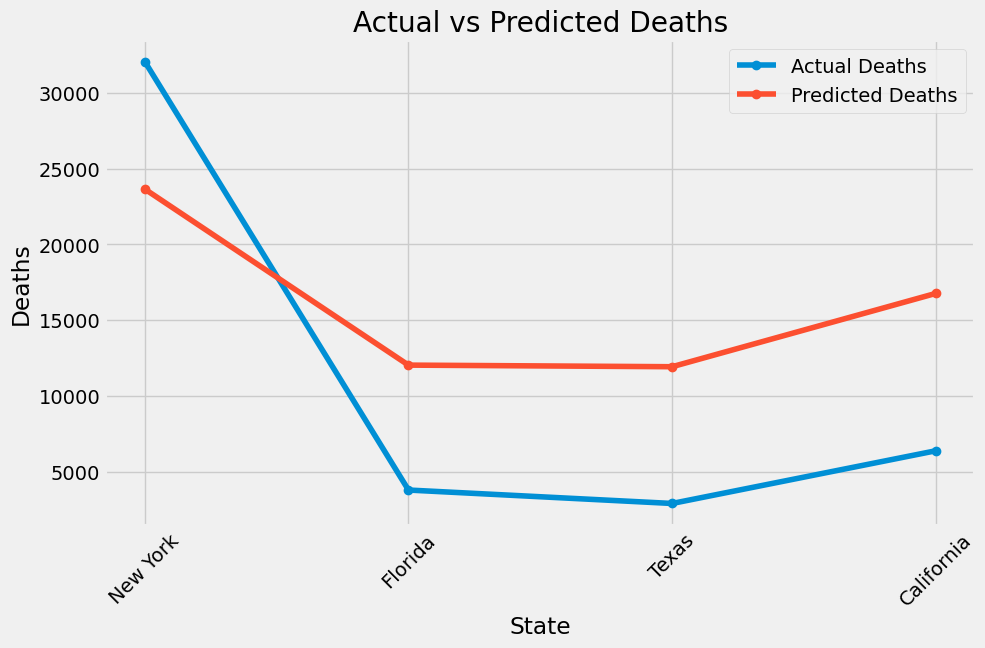

In [271]:
# Hiển thị dự đoán so với giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Deaths', marker='o')
plt.plot(test_data.index, y_pred, label='Predicted Deaths', marker='o')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.title('Actual vs Predicted Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.show()